# ДЗ по Практикуму по программированию

<a id="toc"></a>

### Содержание

* [Часть 1. Предварительная обработка данных](#chapter1)
    * [Раздел 1.1. Чтение и загрузка данных](#section_1_1)
    * [Раздел 1.2. Первичный анализ данных](#section_1_2)
    * [Раздел 1.3. Разделение выборки на обучающую и тестовую выборки](#section_1_3)
    * [Раздел 1.4. Кодирование категориальных признаков](#section_1_4)
    * [Раздел 1.5. Обработка вещественных признаков (заполнение пропусков)](#section_1_5)
    * [Раздел 1.6. Детекция выбросов и аномалий в данных](#section_1_6)
    * [Раздел 1.7. Подведение итогов раздела 1](#section_1_7)
* [Часть 2. Генерация новых признаков](#chapter2)
    * [Раздел 2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#section_2_1)
    * [Раздел 2.2. Исправление проблемы мультиколлинеарности в данных](#section_2_2)
    * [Раздел 2.3. Скалирование данных](#section_2_3)
    * [Раздел 2.4. Подведение итогов раздела 2](#section_2_4)
* [Часть 3. Выбор моделей ML и метрик](#chapter3)
* [Часть 4. Обучение моделей ML и подбор гиперпараметров](#chapter4)
* [Часть 5. Вычисление метрик на новых данных](#chapter5)
* [Часть 6. Результат работы](#chapter6)

Целью данного исследования является: создание модели машинного обучения для предсказания целевой переменной `Гармония Бессмертия`.
Необходимо предсказать непрерывную величину, поэтому класс задачи - регрессия.

Рассмотрим поля датасета

| Поле                         | Описание                                                                 | Диапазон               |
|-------------------------------|--------------------------------------------------------------------------|------------------------|
| Вектор мощи                   | Позиция магического механизма, управляющего интенсивностью перехода через портал | 1.138 - 9.300          |
| Скорость перехода через портал | Скорость, с которой портал перемещает объект через пространство                | 1.54 - 13.88                      |
| Приток силы потока            | Поток магической силы, текущий через ядро портала, обеспечивая его стабильную работу | 253.547 - 72784.872   |
| Ритм магического ядра          | Число оборотов магического ядра портала в минуту                          | 136.939 - 372.880     |
| Поток энергий                 | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую | 6589.002 - 9797.103   |
| Сила левого притока           | Мощность магического потока, текущего через левую сторону портала, поддерживая его баланс | 5.304 - 645.249       |
| Сила правого притока          | Мощность магического потока, текущего через правую сторону портала, обеспечивая равномерное распределение энергии | 5.304 - 645.249       |
| Пламя стихий                   | Температура магической энергии, исходящей из высокого магического источника портала, в градусах Цельсия | 442.364 - 1115.797    |
| Температура вдоха Истока       | Температура воздуха, входящего в магический ускоритель портала, в градусах Цельсия | 736.0                  |
| Температура выдоха Истока      | Температура воздуха, выходящего из магического ускорителя портала, в градусах Цельсия | 550.985 - 787.827                      |
| Приток давления Выдоха Истока | Давление магического потока на выходе из магического источника высокого давления | 1.093 - 4.560         |
| Давление вдоха Истока         | Давление воздуха, входящего в магический ускоритель                        | 1.394603                      |
| Давление выхода Истока        | Давление воздуха, исходящего из магического ускорителя                      | 5.828 - 23.140        |
| Древний Ветер                 | Давление древней магической энергии, покидающей портал в виде выполненного потока | 1.019 - 1.049                      |
| Печать Чародея               | Параметр управления магическим впрыском в сердце портала, выраженный в процентах | 0.000 - 92.556        |
| Эмульсия Истока               | Количество магического топлива, подпитывающего портал                      | 0.068 - 1.832         |
| Дыхание Истока                | Коэффициент, отображающий степень угасания магического ускорителя           | 0.950 - 1.000         |
| Гармония Бессмертия            | Целевая переменная, указывающая на состояние магического ядра портала и его стабильность, требующая магического восстановления в случае снижения | 0.975 - 1.000         |
| Тип Вектора Мощи              | Метка типа позиции магического механизма                                  | Слабый, Ниже среднего, Выше среднего, Сильный                      |
| Номер пометки                 | Уникальный номер записи о работе портала в блокноте                        | 0 - 11933     |

Определим формулы, применимые в данной прикладной области

<b>Совокупная мощность потоков</b>

$f_{sum} = f_{left} + f_{right} + f_c$

Где

$f_{sum}$ - Совокупная мощность потоков

$f_{left}$ - Сила левого потока

$f_{right}$ - Сила правого потока

$f_c$ - Приток силы потоков

<br>

<b>Общая сила ядра</b>

$k_{sum} = r * f_c$

Где

$k_{sum}$ - Общая сила ядра

$r$ - Ритм магического ядра

$f_c$ - Приток силы потоков


<br>

<b>Общее давление</b>

$P_{sum} = P_{out} + \Delta P$

Где

$P_{sum}$ - Общее давление

$P_{out}$ - Давление Выдоха Истока

$\Delta P$ - Приток давления Выдоха Истока

<br>

<b>Магическая производительность</b>

$V = \frac{v}{e}$

Где

$V$ - Магическая производительность

$v$ - Скорость перехода через портал

$e$ - Эмульсия истока


<br>

<b>Эффективность ядра</b>

$E_k = \frac{k_{sum}}{e}$

Где

$E_k$ - Эффективность ядра

$k_{sum}$ - Общая сила ядра

$e$ - Эмульсия истока


<br>

<b>Степень износа магических источников</b>

$U = \frac{b}{H}$

Где

$U$ - Степень износа магических источников

$b$ - Дыхание истока

$H$ - Гармония бессмертия

<p style="color: red;"><b>Формулу невозможно применить для решения задачи, т.к. она содержит целевую переменную!</b></p>
<br>

<b>Расхождение в стабильности магии</b>

$\Delta S = |b - H|$

Где

$\Delta S$ - Степень износа магических источников

$b$ - Дыхание истока

$H$ - Гармония бессмертия

<p style="color: red;"><b>Формулу невозможно применить для решения задачи, т.к. она содержит целевую переменную!</b></p>
<br>

<b>Баланс угасания</b>

$B = \frac{\Delta S}{v}$

Где

$\Delta S$ - Расхождение в стабильности магии

$B$ - Баланс угасания

$v$ - Скорость перехода через портал

<p style="color: red;"><b>Формулу невозможно применить для решения задачи, т.к. она содержит целевую переменную!</b></p>

<br>

<br>

Работа велась на `Python 3.10.11`

In [322]:
!python --version

Python 3.10.11


Были использованы следующие библиотеки:

* pandas
* numpy
* scikit-learn
* matplotlib
* seaborn
* pyod
* optuna

Импортируем наиболее часто встречающиеся библиотеки

In [323]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

Зафиксируем случайный seed

In [324]:
seed = 42
np.random.seed(seed)

# 1. Предварительная обработка данных <a class="anchor" id="chapter1"></a> [↑](#toc)

## 1.1. Чтение и загрузка данных <a class="anchor" id="section_1_1"></a> [↑](#toc)

In [325]:
import pandas as pd

data = pd.read_csv('D:/PythonWork/OldZmiy/NLPWork/data/portal_data.csv', encoding='Windows-1251', delimiter='|')
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.7166,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,Не определено,10.990,1.027,23.803,0.471,1.00,1.000,Выше среднего,11929
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,-,2.512,Не определено,13.109,-,32.671,0.647,1.00,1.000,Выше среднего,11930
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,Не определено,15.420,1.036,42.104,0.834,1.00,1.000,Сильный,11931
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,-,3.594,Не определено,18.293,-,58.064,1.149,1.00,1.000,Сильный,11932


## 1.2. Первичный анализ данных <a class="anchor" id="section_1_2"></a> [↑](#toc)

В данных имеются пропуски (`-`, `Не определено`). Приведем их к единому виду `None`

In [326]:
data.replace('-', None, inplace=True)
data.replace('Не определено', None, inplace=True)
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,None,1.096,None,5.947,None,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,None,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,None,1.389,None,7.574,None,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,None,1.658,None,9.007,None,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,None,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.7166,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,None,10.990,1.027,23.803,0.471,1.00,1.000,Выше среднего,11929
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,None,2.512,None,13.109,None,32.671,0.647,1.00,1.000,Выше среднего,11930
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,None,15.420,1.036,42.104,0.834,1.00,1.000,Сильный,11931
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,None,3.594,None,18.293,None,58.064,1.149,1.00,1.000,Сильный,11932


Проверим типы полей датасета

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       2387 non-null   object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           2439 non-null   object 
 12  Давление выдоха Истока          

`Скорость перехода через портал`, `Температура выдоха Истока`, `Давление вдоха Истока`, `Древний Ветер` необходимо привести к вещественному типу

In [328]:
cols_to_float = ['Скорость перехода через портал', 'Температура выдоха Истока', 'Давление вдоха Истока', 'Древний Ветер']

for col in cols_to_float:
    data[col] = data[col].astype(float)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       2387 non-null   float64
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           2439 non-null   float64
 12  Давление выдоха Истока          

Можно отбросить признаки:
* `Номер пометки`, т.к. признак отражает уникальный номер каждой записи
* `Температура вдоха Истока` и `Давление вдоха Истока`, т.к. их значения постоянны

In [329]:
cols_to_del = ['Номер пометки', 'Температура вдоха Истока', 'Давление вдоха Истока']

data = data.drop(cols_to_del, axis=1)

data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,NaN,1.096,5.947,NaN,7.137,0.082,0.95,0.975,Слабый
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975,Слабый
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,NaN,1.389,7.574,NaN,13.086,0.259,0.95,0.975,Ниже среднего
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,NaN,1.658,9.007,NaN,18.109,0.358,0.95,0.975,Ниже среднего
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,628.950,2.087,10.990,1.027,23.803,0.471,1.00,1.000,Выше среднего
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,NaN,2.512,13.109,NaN,32.671,0.647,1.00,1.000,Выше среднего
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,680.393,2.982,15.420,1.036,42.104,0.834,1.00,1.000,Сильный
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,NaN,3.594,18.293,NaN,58.064,1.149,1.00,1.000,Сильный


## 1.3. Разделение выборки на обучающую и тестовую выборки <a class="anchor" id="section_1_3"></a> [↑](#toc)

Разделим выборку в следующем отношении: train = 80%, test = 20%, т.к. датасет имеет большой объем, что позволяет сделать тестовую выборку также крупной

In [330]:
y = data['Гармония Бессмертия']
X = data.drop(['Гармония Бессмертия'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
3685,5.140,NaN,21634.909,201.516309,8497.497,175.278,175.278,704.972,NaN,2.078,11.004,NaN,24.951,0.494,0.965,Выше среднего
5886,1.138,1.54332,2706.698,138.966361,6622.351,6.270,6.270,545.800,NaN,1.184,6.450,NaN,26.222,0.194,0.975,Слабый
6108,7.148,10.80324,38998.248,280.444531,9120.644,332.275,332.275,835.034,NaN,2.980,15.730,NaN,44.789,0.887,0.976,Сильный
7713,1.138,1.54332,6763.006,144.782287,6697.636,9.375,9.375,620.925,NaN,1.322,7.078,NaN,0.000,0.278,0.982,Слабый
3499,8.206,12.34656,50994.067,323.324443,9319.460,438.106,438.106,917.854,NaN,3.566,18.180,NaN,59.577,1.179,0.964,Сильный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.206,12.34656,50989.676,323.300567,9292.800,437.925,437.925,915.018,725.973,3.607,18.693,1.042,60.083,1.189,0.998,Сильный
5191,8.206,12.34656,50993.686,323.319312,9306.729,438.021,438.021,933.160,734.056,3.589,18.621,1.041,61.190,1.211,0.972,Сильный
5390,9.300,NaN,72759.686,372.841179,9751.200,644.872,644.872,1089.292,780.775,4.526,22.961,1.050,90.760,1.797,0.973,Сильный
860,6.175,9.25992,29797.053,241.615179,8842.649,246.362,246.362,779.989,671.876,2.497,13.129,1.030,34.453,0.682,0.953,Выше среднего


## 1.4. Кодирование категориальных признаков <a class="anchor" id="section_1_4"></a> [↑](#toc)

`Тип Вектора Мощи` является категориальным признаком. 

Закодируем его значения следующим образом:

- `Слабый` -> 0
- `Ниже среднего` -> 1
- `Выше среднего` -> 2
- `Сильный` -> 3

In [331]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный']]
enc = OrdinalEncoder(categories=categories)

X_train['Тип Вектора Мощи'] = enc.fit_transform(X_train[['Тип Вектора Мощи']]).astype(int)
X_test['Тип Вектора Мощи'] = enc.fit_transform(X_test[['Тип Вектора Мощи']]).astype(int)

X_train['Тип Вектора Мощи']

3685     2
5886     0
6108     3
7713     0
3499     3
        ..
11284    3
5191     3
5390     3
860      2
7270     3
Name: Тип Вектора Мощи, Length: 9547, dtype: int32

## 1.5. Обработка вещественных признаков (заполнение пропусков) <a class="anchor" id="section_1_5"></a> [↑](#toc)

Узнаем, в каких столбцах есть пропуски

In [332]:
data.isna().sum()

Вектор Мощи                          0
Скорость перехода через портал    1203
Приток Силы Потока                   0
Ритм магического ядра                0
Поток Энергий                        0
Сила Левого Потока                   0
Сила Правого Потока                  0
Пламя Стихий                         0
Температура выдоха Истока         9547
Приток давления Выдоха Истока        0
Давление выдоха Истока               0
Древний Ветер                     9547
Печать Чародея                       0
Эмульсия Истока                      0
Дыхание Истока                       0
Гармония Бессмертия                  0
Тип Вектора Мощи                     0
dtype: int64

Пропуски имеются в столбцах `Скорость перехода через портал`, `Температура выдоха Истока`, `Древний Ветер`

In [333]:
cols = ['Скорость перехода через портал', 'Температура выдоха Истока', 'Древний Ветер']

### Заполнение пропусков в данных с помощью статистических подходов

Заполнить пропуски можно:

- <b>Средним значением</b>
- <b>Медианой</b>
- <b>Модой</b>

Функция, рассчитывающая KL-дивергенцию между распределениями

In [334]:
from scipy.stats import entropy

def calculate_kl_divergence(dataset_before, dataset_after):
    kl_results = []
    
    for column in dataset_before.columns:
        before_data = dataset_before[column]
        after_data = dataset_after[column]

        bins = np.histogram_bin_edges(np.concatenate([before_data.dropna(), after_data.dropna()]), bins='auto')
        hist_before, _ = np.histogram(before_data.dropna(), bins=bins, density=True)
        hist_after, _ = np.histogram(after_data.dropna(), bins=bins, density=True)

        min_len = min(len(hist_before), len(hist_after))
        hist_before = hist_before[:min_len]
        hist_after = hist_after[:min_len]

        try:
            kl_div = entropy(hist_before, hist_after)
            kl_results.append((column, kl_div))
        except ValueError:
            print(f"Не получилось посчиталь для {column}: что-то не так с нулевыми значениями")
                
    return kl_results

Функция для построения гистограмм для сравнения

In [335]:
def compare_distributions(data_before, data_after):
    plt.figure(figsize=(3, 3))
    
    for c in cols:
        data_before.hist(c, bins=10)
        data_after.hist(c, bins=10)

        plt.title(c)
        plt.xlabel('Значения')
        plt.ylabel('Плотность')
        plt.legend()
        plt.grid(True)
        plt.show()

##### Для среднего арифметического

In [336]:
mean_fill_data = X_train.copy()
    
mean_portal_speed = X_train['Скорость перехода через портал'].mean()
mean_fill_data.fillna({'Скорость перехода через портал': mean_portal_speed}, inplace=True)

mean_spring_t = X_train['Температура выдоха Истока'].mean()
mean_fill_data.fillna({'Температура выдоха Истока': mean_spring_t}, inplace=True)

mean_ancient_wind = X_train['Древний Ветер'].mean()
mean_fill_data.fillna({'Древний Ветер': mean_ancient_wind}, inplace=True)

In [337]:
mean_kl_values = calculate_kl_divergence(X_train[cols], mean_fill_data[cols])
for col, div in mean_kl_values:
    print(f"'{col}' имеет KL-дивергенцию: {div:.4f}")

'Скорость перехода через портал' имеет KL-дивергенцию: 0.0288
'Температура выдоха Истока' имеет KL-дивергенцию: 1.2888
'Древний Ветер' имеет KL-дивергенцию: 1.3862


C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 300x300 with 0 Axes>

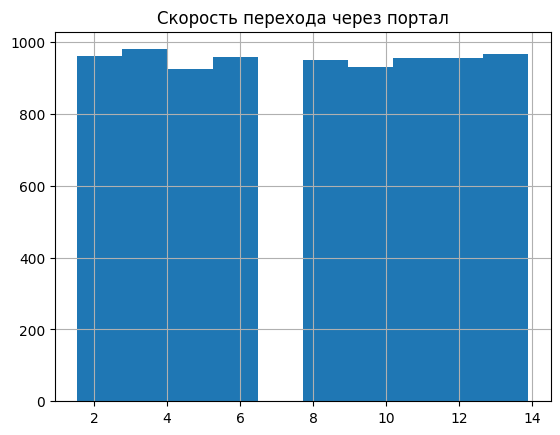

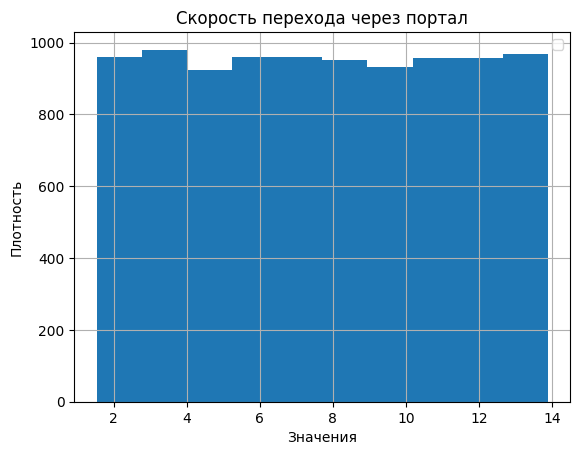

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


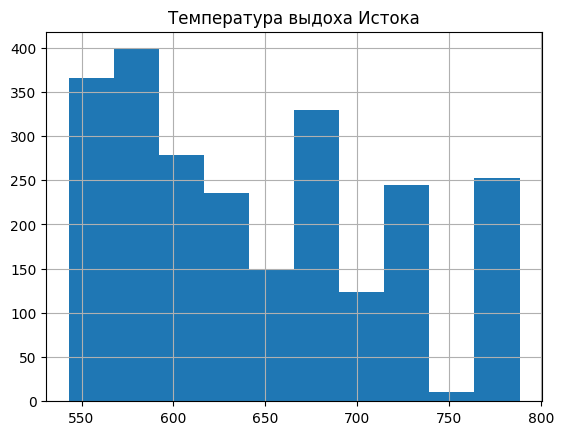

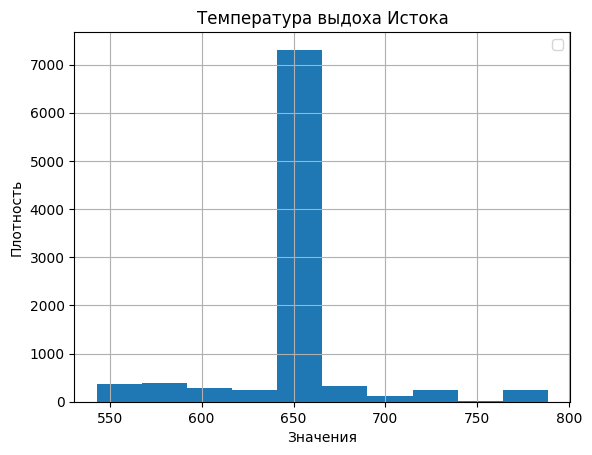

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


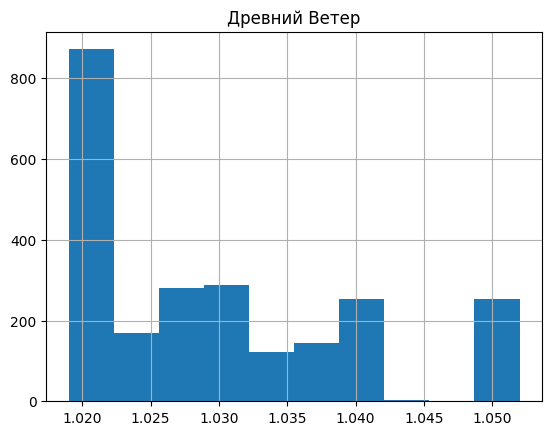

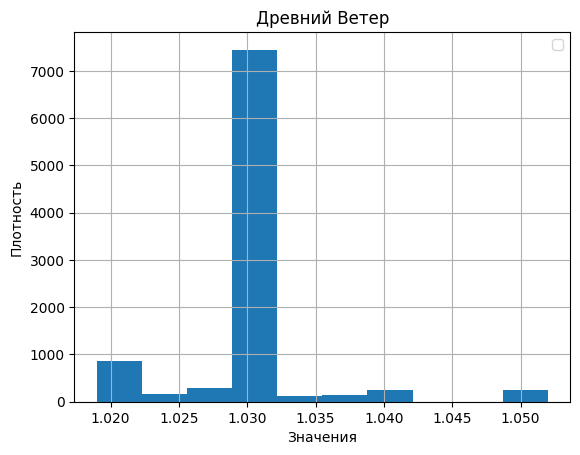

In [338]:
compare_distributions(X_train[cols], mean_fill_data[cols])

##### Для медианы

In [339]:
med_fill_data = X_train.copy()
    
med_portal_speed = X_train['Скорость перехода через портал'].median()
med_fill_data.fillna({'Скорость перехода через портал': med_portal_speed}, inplace=True)

med_spring_t = X_train['Температура выдоха Истока'].median()
med_fill_data.fillna({'Температура выдоха Истока': med_spring_t}, inplace=True)

med_ancient_wind = X_train['Древний Ветер'].median()
med_fill_data.fillna({'Древний Ветер': med_ancient_wind}, inplace=True)

In [340]:
med_kl_values = calculate_kl_divergence(X_train[cols], med_fill_data[cols])
for col, div in med_kl_values:
    print(f"'{col}' имеет KL-дивергенцию: {div:.4f}")

'Скорость перехода через портал' имеет KL-дивергенцию: 0.0288
'Температура выдоха Истока' имеет KL-дивергенцию: 1.0466
'Древний Ветер' имеет KL-дивергенцию: 1.0005


C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 300x300 with 0 Axes>

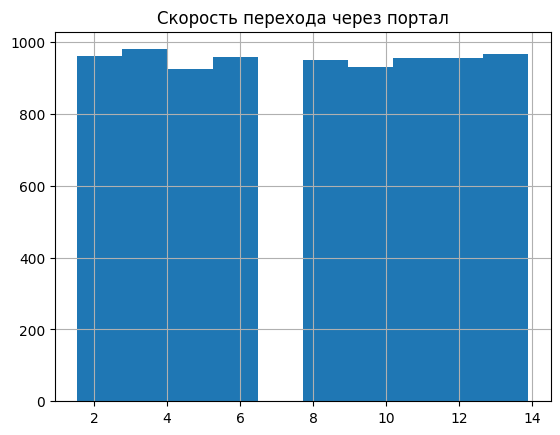

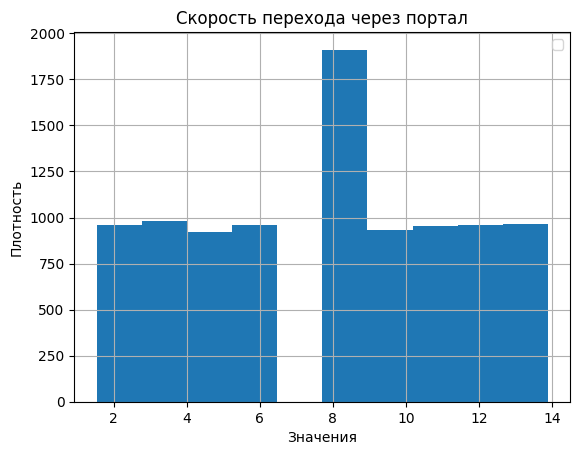

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


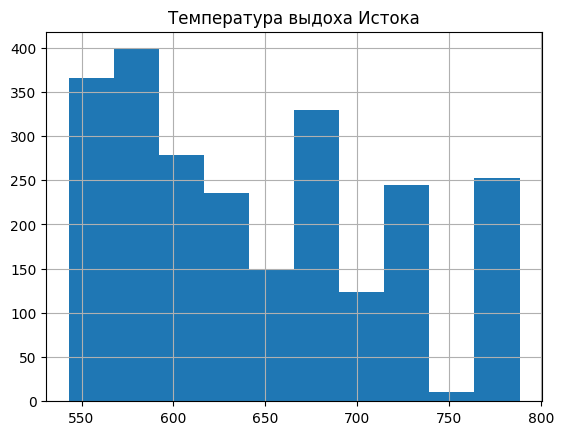

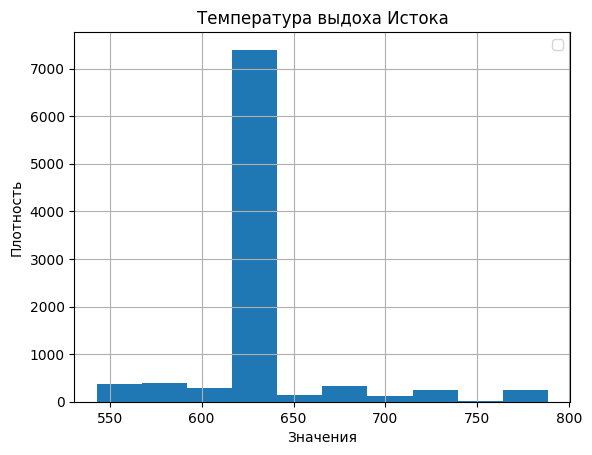

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


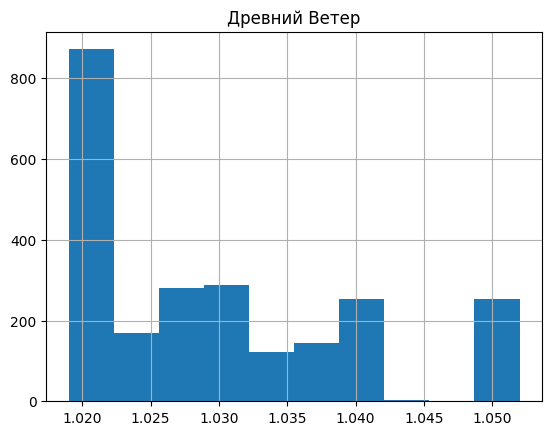

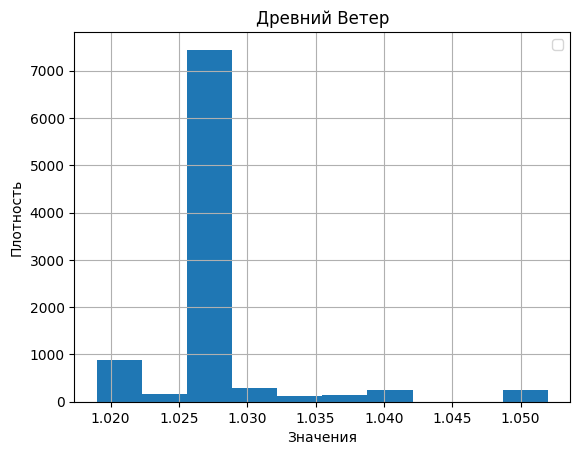

In [341]:
compare_distributions(X_train[cols], med_fill_data[cols])

##### Для моды

In [342]:
mod_fill_data = X_train.copy()

mod_portal_speed = X_train.dropna()['Скорость перехода через портал'].mode().mean()
mod_fill_data.fillna({'Скорость перехода через портал': mod_portal_speed}, inplace=True)

mod_spring_t = X_train.dropna()['Температура выдоха Истока'].mode().mean()
mod_fill_data.fillna({'Температура выдоха Истока': mod_spring_t}, inplace=True)

mod_ancient_wind = X_train.dropna()['Древний Ветер'].mode().mean()
mod_fill_data.fillna({'Древний Ветер': mod_ancient_wind}, inplace=True)

In [343]:
mod_kl_values = calculate_kl_divergence(X_train[cols], mod_fill_data[cols])
for col, div in mod_kl_values:
    print(f"'{col}' имеет KL-дивергенцию: {div:.4f}")

'Скорость перехода через портал' имеет KL-дивергенцию: 0.0292
'Температура выдоха Истока' имеет KL-дивергенцию: 1.0466
'Древний Ветер' имеет KL-дивергенцию: 0.9183


C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 300x300 with 0 Axes>

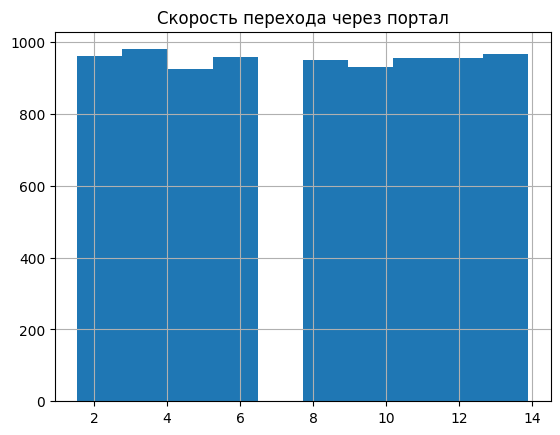

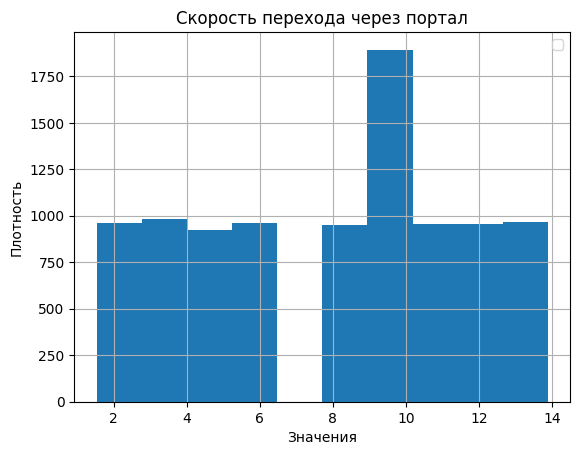

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


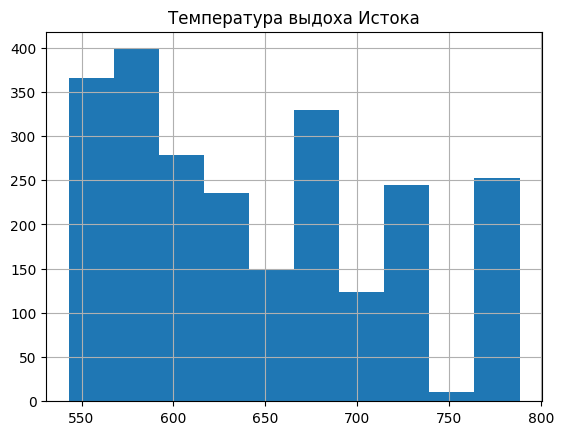

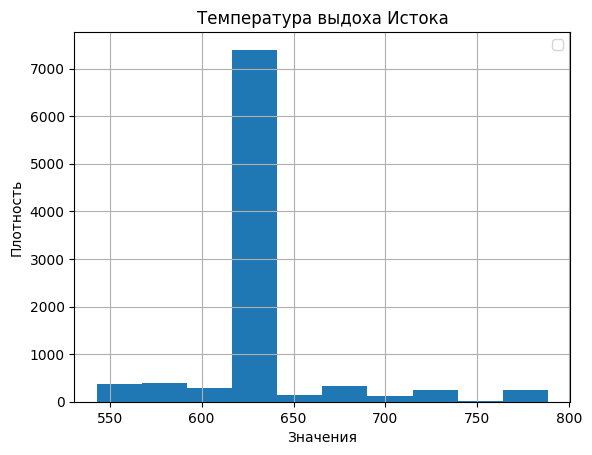

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


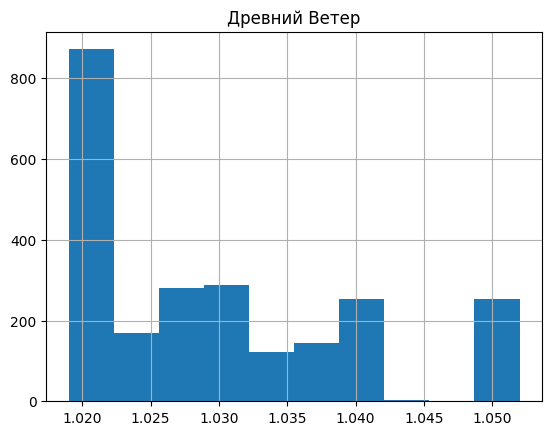

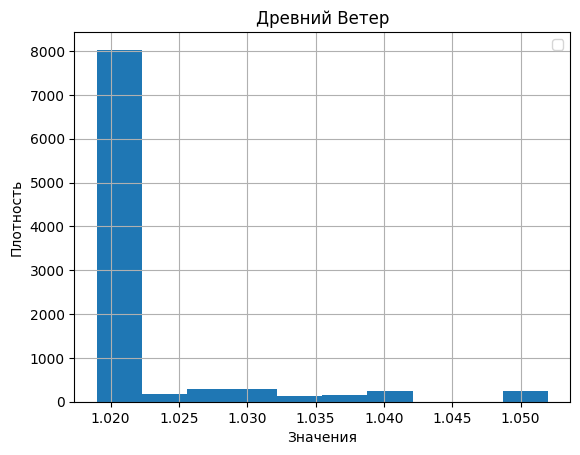

In [344]:
compare_distributions(X_train[cols], mod_fill_data[cols])

Сравним между собой значения k-дивергенции разных способов заполнения пропусков.

In [345]:
print('Для среднего:')
mean_kl_values = calculate_kl_divergence(X_train[cols], mean_fill_data[cols])
for col, div in mean_kl_values:
    print(f"'{col}' имеет KL-дивергенцию: {div:.4f}")
    
print('\nДля медианы:')
mean_kl_values = calculate_kl_divergence(X_train[cols], med_fill_data[cols])
for col, div in mean_kl_values:
    print(f"'{col}' имеет KL-дивергенцию: {div:.4f}")
    
print('\nДля моды:')
mean_kl_values = calculate_kl_divergence(X_train[cols], mod_fill_data[cols])
for col, div in mean_kl_values:
    print(f"'{col}' имеет KL-дивергенцию: {div:.4f}")

Для среднего:
'Скорость перехода через портал' имеет KL-дивергенцию: 0.0288
'Температура выдоха Истока' имеет KL-дивергенцию: 1.2888
'Древний Ветер' имеет KL-дивергенцию: 1.3862

Для медианы:
'Скорость перехода через портал' имеет KL-дивергенцию: 0.0288
'Температура выдоха Истока' имеет KL-дивергенцию: 1.0466
'Древний Ветер' имеет KL-дивергенцию: 1.0005

Для моды:
'Скорость перехода через портал' имеет KL-дивергенцию: 0.0292
'Температура выдоха Истока' имеет KL-дивергенцию: 1.0466
'Древний Ветер' имеет KL-дивергенцию: 0.9183


`Скорость перехода через портал` и `Температура выдоха Истока` заполним значением <b>медианы</b>. А `Древний Ветер` - значением <b>моды</b>

In [346]:
X_train_stat, X_test_stat = X_train.copy(), X_test.copy()

In [347]:
replacements = {
    'Скорость перехода через портал': med_portal_speed,
    'Температура выдоха Истока': med_spring_t,
    'Древний Ветер': mod_ancient_wind
}

X_train_stat.fillna(replacements, inplace=True)
X_test_stat.fillna(replacements, inplace=True)

X_train_stat

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
3685,5.140,7.71660,21634.909,201.516309,8497.497,175.278,175.278,704.972,636.963,2.078,11.004,1.019,24.951,0.494,0.965,2
5886,1.138,1.54332,2706.698,138.966361,6622.351,6.270,6.270,545.800,636.963,1.184,6.450,1.019,26.222,0.194,0.975,0
6108,7.148,10.80324,38998.248,280.444531,9120.644,332.275,332.275,835.034,636.963,2.980,15.730,1.019,44.789,0.887,0.976,3
7713,1.138,1.54332,6763.006,144.782287,6697.636,9.375,9.375,620.925,636.963,1.322,7.078,1.019,0.000,0.278,0.982,0
3499,8.206,12.34656,50994.067,323.324443,9319.460,438.106,438.106,917.854,636.963,3.566,18.180,1.019,59.577,1.179,0.964,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.206,12.34656,50989.676,323.300567,9292.800,437.925,437.925,915.018,725.973,3.607,18.693,1.042,60.083,1.189,0.998,3
5191,8.206,12.34656,50993.686,323.319312,9306.729,438.021,438.021,933.160,734.056,3.589,18.621,1.041,61.190,1.211,0.972,3
5390,9.300,7.71660,72759.686,372.841179,9751.200,644.872,644.872,1089.292,780.775,4.526,22.961,1.050,90.760,1.797,0.973,3
860,6.175,9.25992,29797.053,241.615179,8842.649,246.362,246.362,779.989,671.876,2.497,13.129,1.030,34.453,0.682,0.953,2


### Заполнение пропусков в данных с помощью машинных методов

Воспользуемся `IterativeImputer`

In [348]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns = X_train.columns

imputer_mice = IterativeImputer(max_iter=10, random_state=0)
X_train_iter = imputer_mice.fit_transform(X_train)
X_test_iter = imputer_mice.transform(X_test)

X_train_iter = pd.DataFrame(X_train_iter, columns=columns)
X_test_iter = pd.DataFrame(X_test_iter, columns=columns)

X_train_iter

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
0,5.140,7.704517,21634.909,201.516309,8497.497,175.278,175.278,704.972,638.278283,2.078,11.004,1.026144,24.951,0.494,0.965,2.0
1,1.138,1.543320,2706.698,138.966361,6622.351,6.270,6.270,545.800,556.728752,1.184,6.450,1.018680,26.222,0.194,0.975,0.0
2,7.148,10.803240,38998.248,280.444531,9120.644,332.275,332.275,835.034,692.365652,2.980,15.730,1.035330,44.789,0.887,0.976,3.0
3,1.138,1.543320,6763.006,144.782287,6697.636,9.375,9.375,620.925,571.383906,1.322,7.078,1.019340,0.000,0.278,0.982,0.0
4,8.206,12.346560,50994.067,323.324443,9319.460,438.106,438.106,917.854,730.726125,3.566,18.180,1.041367,59.577,1.179,0.964,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,8.206,12.346560,50989.676,323.300567,9292.800,437.925,437.925,915.018,725.973000,3.607,18.693,1.042000,60.083,1.189,0.998,3.0
9543,8.206,12.346560,50993.686,323.319312,9306.729,438.021,438.021,933.160,734.056000,3.589,18.621,1.041000,61.190,1.211,0.972,3.0
9544,9.300,13.925193,72759.686,372.841179,9751.200,644.872,644.872,1089.292,780.775000,4.526,22.961,1.050000,90.760,1.797,0.973,3.0
9545,6.175,9.259920,29797.053,241.615179,8842.649,246.362,246.362,779.989,671.876000,2.497,13.129,1.030000,34.453,0.682,0.953,2.0


Сравним распределения до и после заполнения пропусков

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 300x300 with 0 Axes>

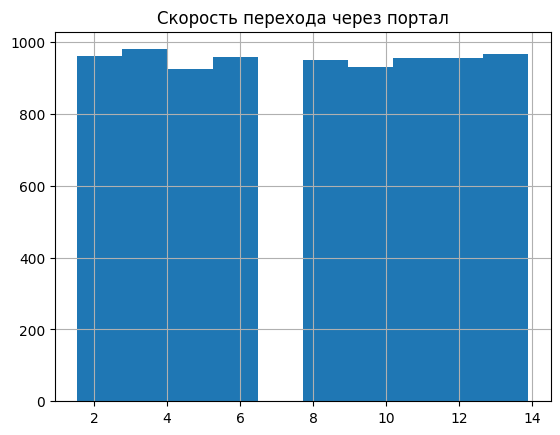

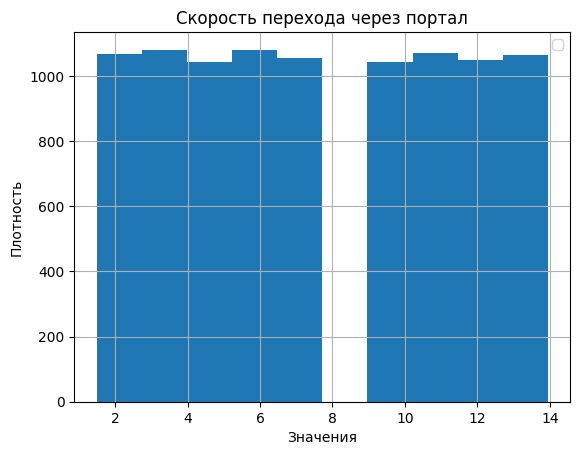

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


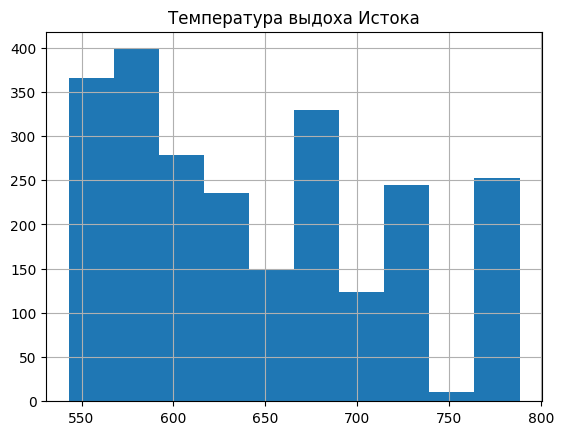

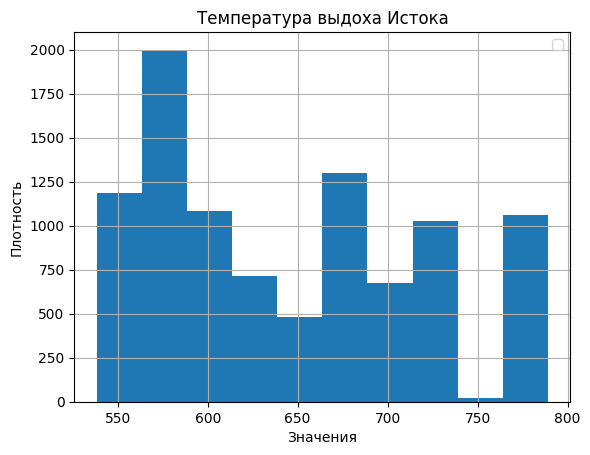

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


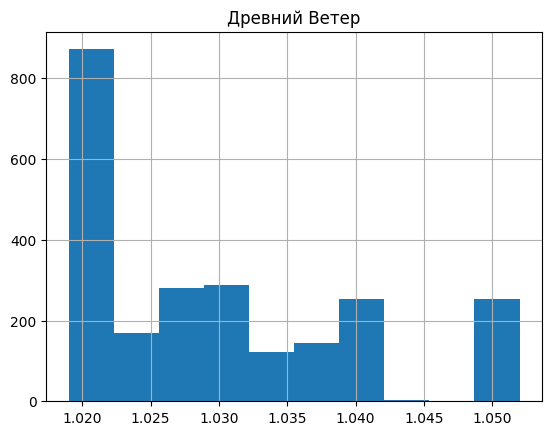

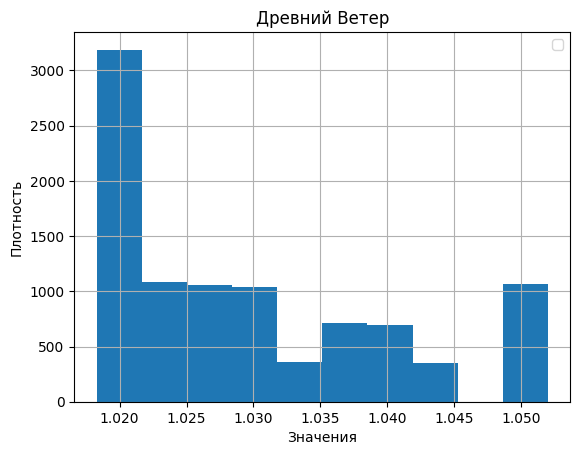

In [349]:
compare_distributions(X_train[cols], X_train_iter[cols])

Воспользуемся также `KNNImputer`

In [350]:
from sklearn.impute import KNNImputer
import pandas as pd

knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn = knn_imputer.fit_transform(X_train)
X_test_knn = knn_imputer.transform(X_test)

X_train_knn = pd.DataFrame(X_train_knn, columns=columns, index=X_train.index)
X_test_knn = pd.DataFrame(X_test_knn, columns=columns, index=X_test.index)

y_train_aligned = y_train.loc[X_train_knn.index]
y_test_aligned = y_test.loc[X_test_knn.index]

Сравним распределения признаков до и после заполнения пропусков

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 300x300 with 0 Axes>

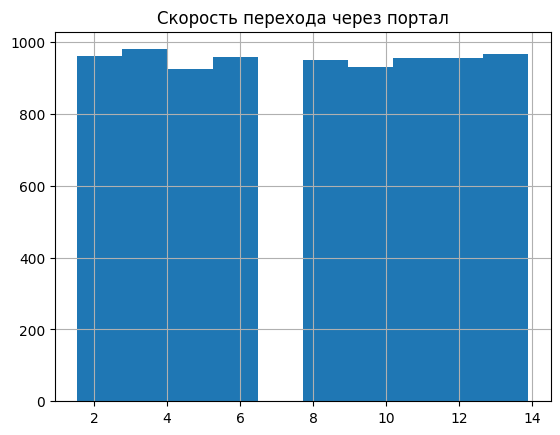

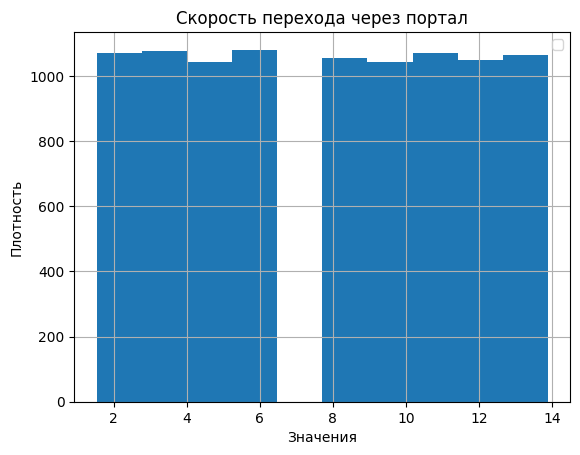

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


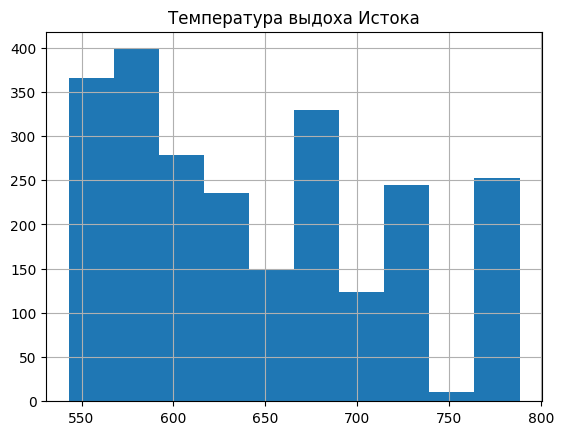

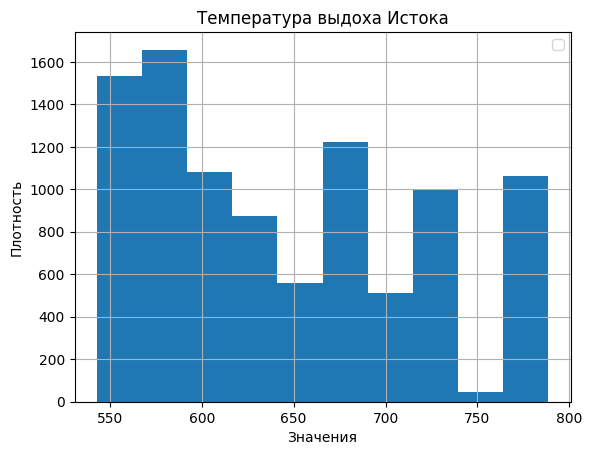

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\708187706.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


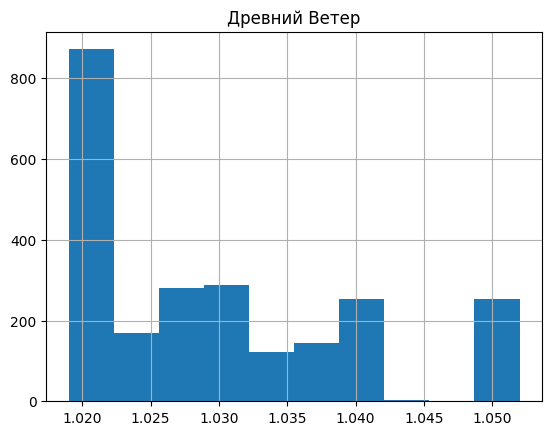

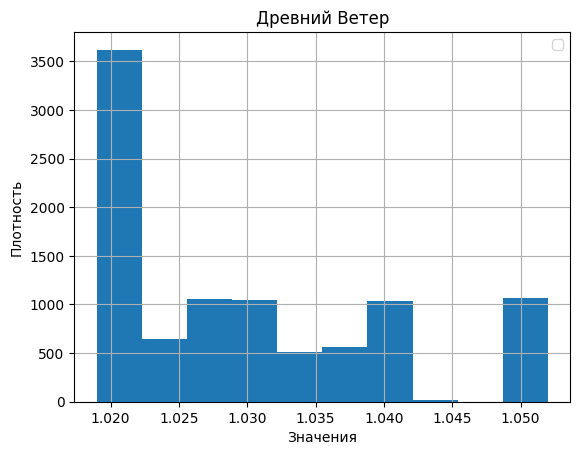

In [351]:
compare_distributions(X_train[cols], X_train_knn[cols])

## 1.6. Детекция выбросов и аномалий в данных <a class="anchor" id="section_1_6"></a> [↑](#toc)

Функция для построения трех столбцов различных диаграмм

In [352]:
from matplotlib.axes._axes import Axes


def draw_sns(df, visualization_function, figsize=(20, 20), **kwargs):
    n_col = 3
    n = len(df.columns)
    n_row = int(np.ceil(n / n_col))
    
    _, ax = plt.subplots(n_row, n_col, figsize=figsize)
    
    columns = df.columns
    
    for i in range(n_row):
        for j in range(n_col):
            k = i * n_col + j
            if k == n:
                break
            column = columns[k]
            x = df[column]
            visualization_function(x, ax=ax[i, j], **kwargs)

Построим гистограммы распределения признаков

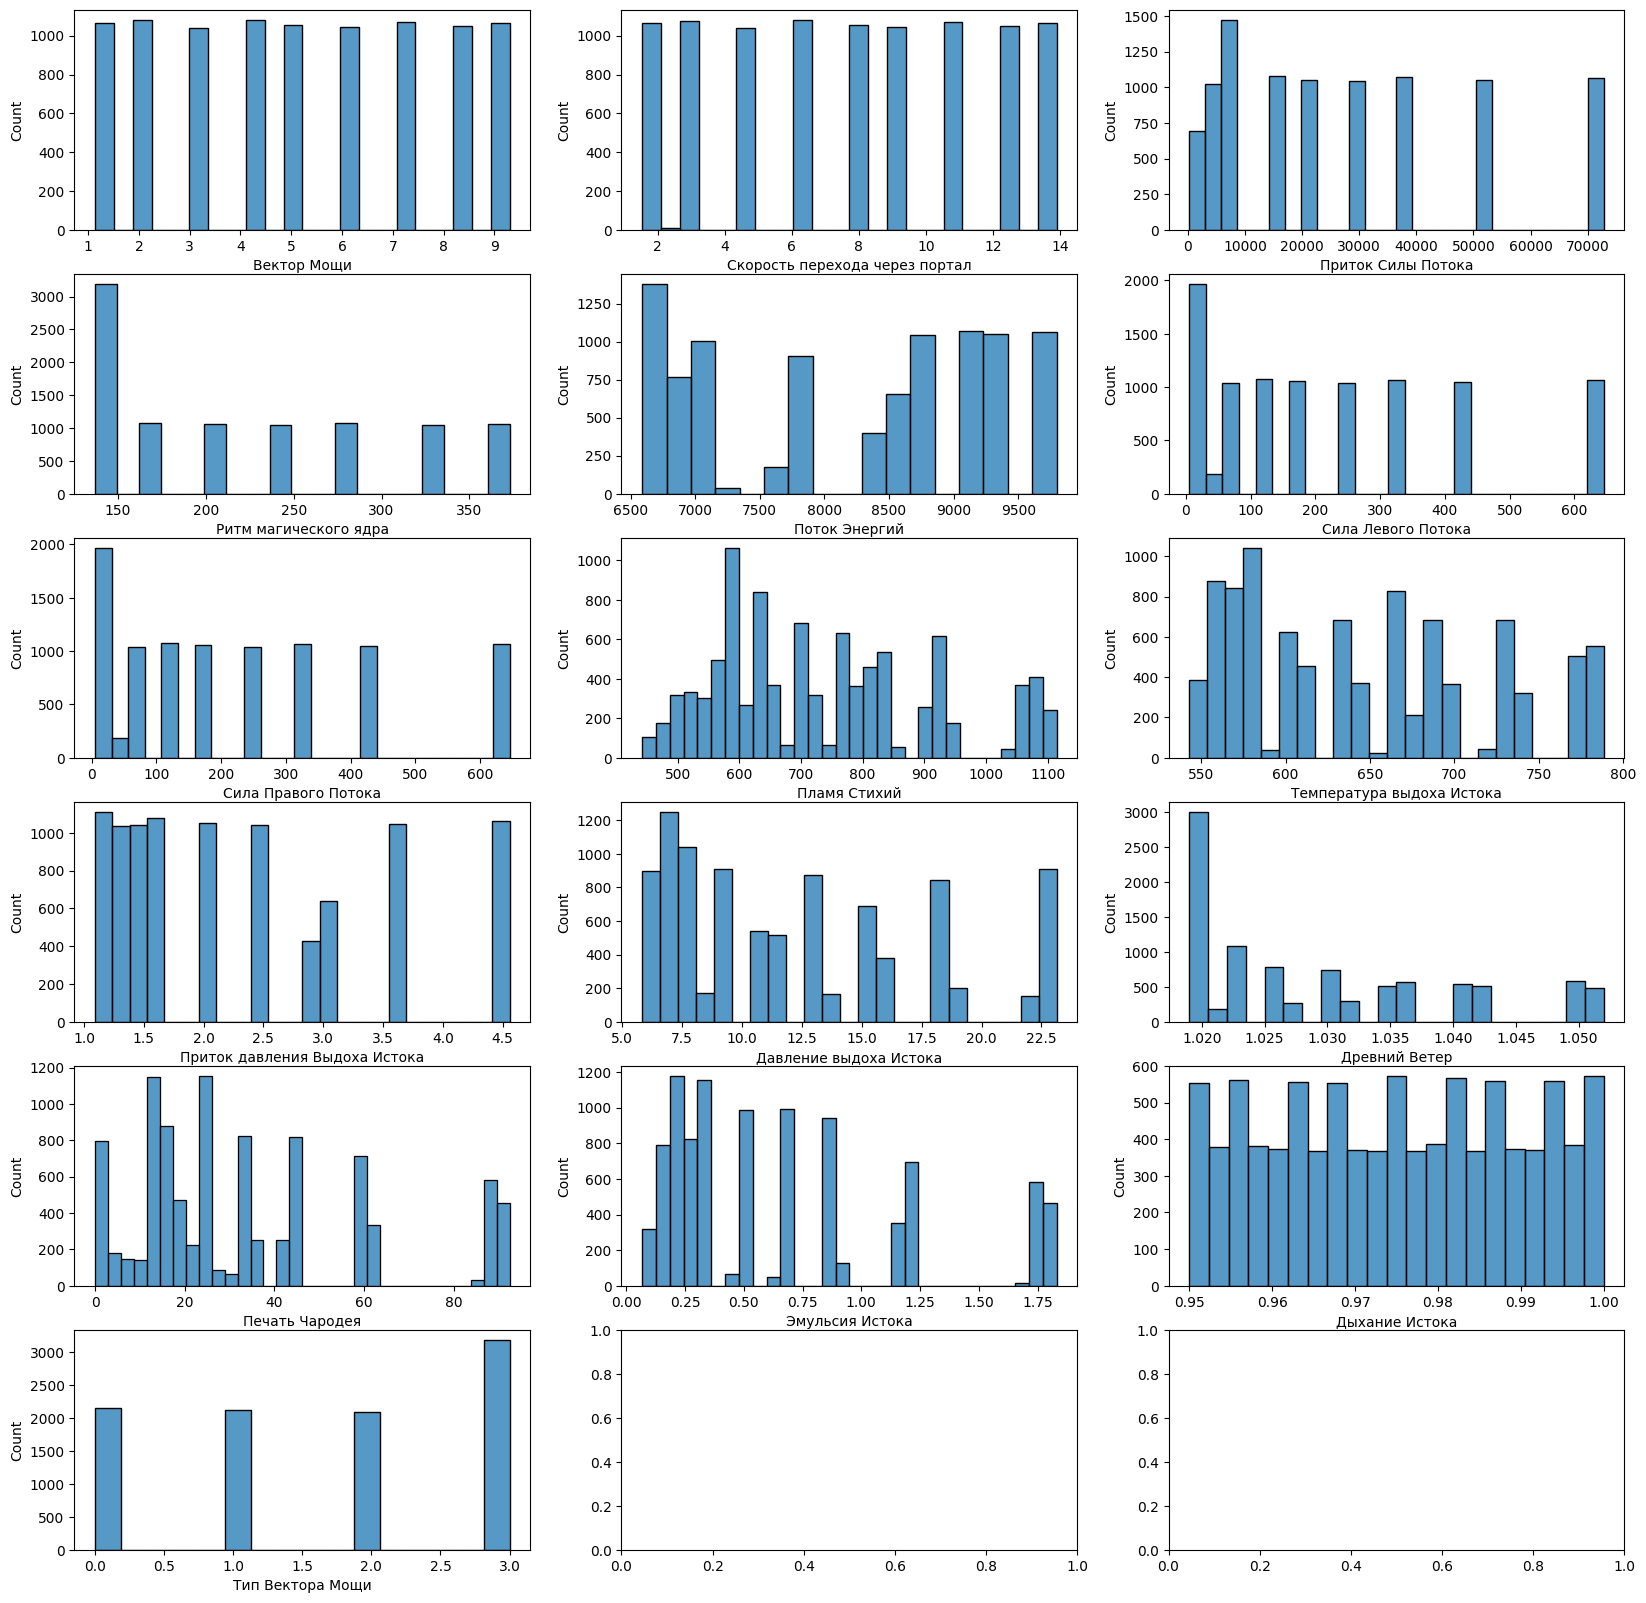

In [353]:
draw_sns(X_train_knn, visualization_function=sns.histplot)

Заметим, что выбросы на данных гистограммах ярко не выражены 

### Квартильный анализ

Воспользуемся диаграммой "Ящик с усами" для определения выбросов

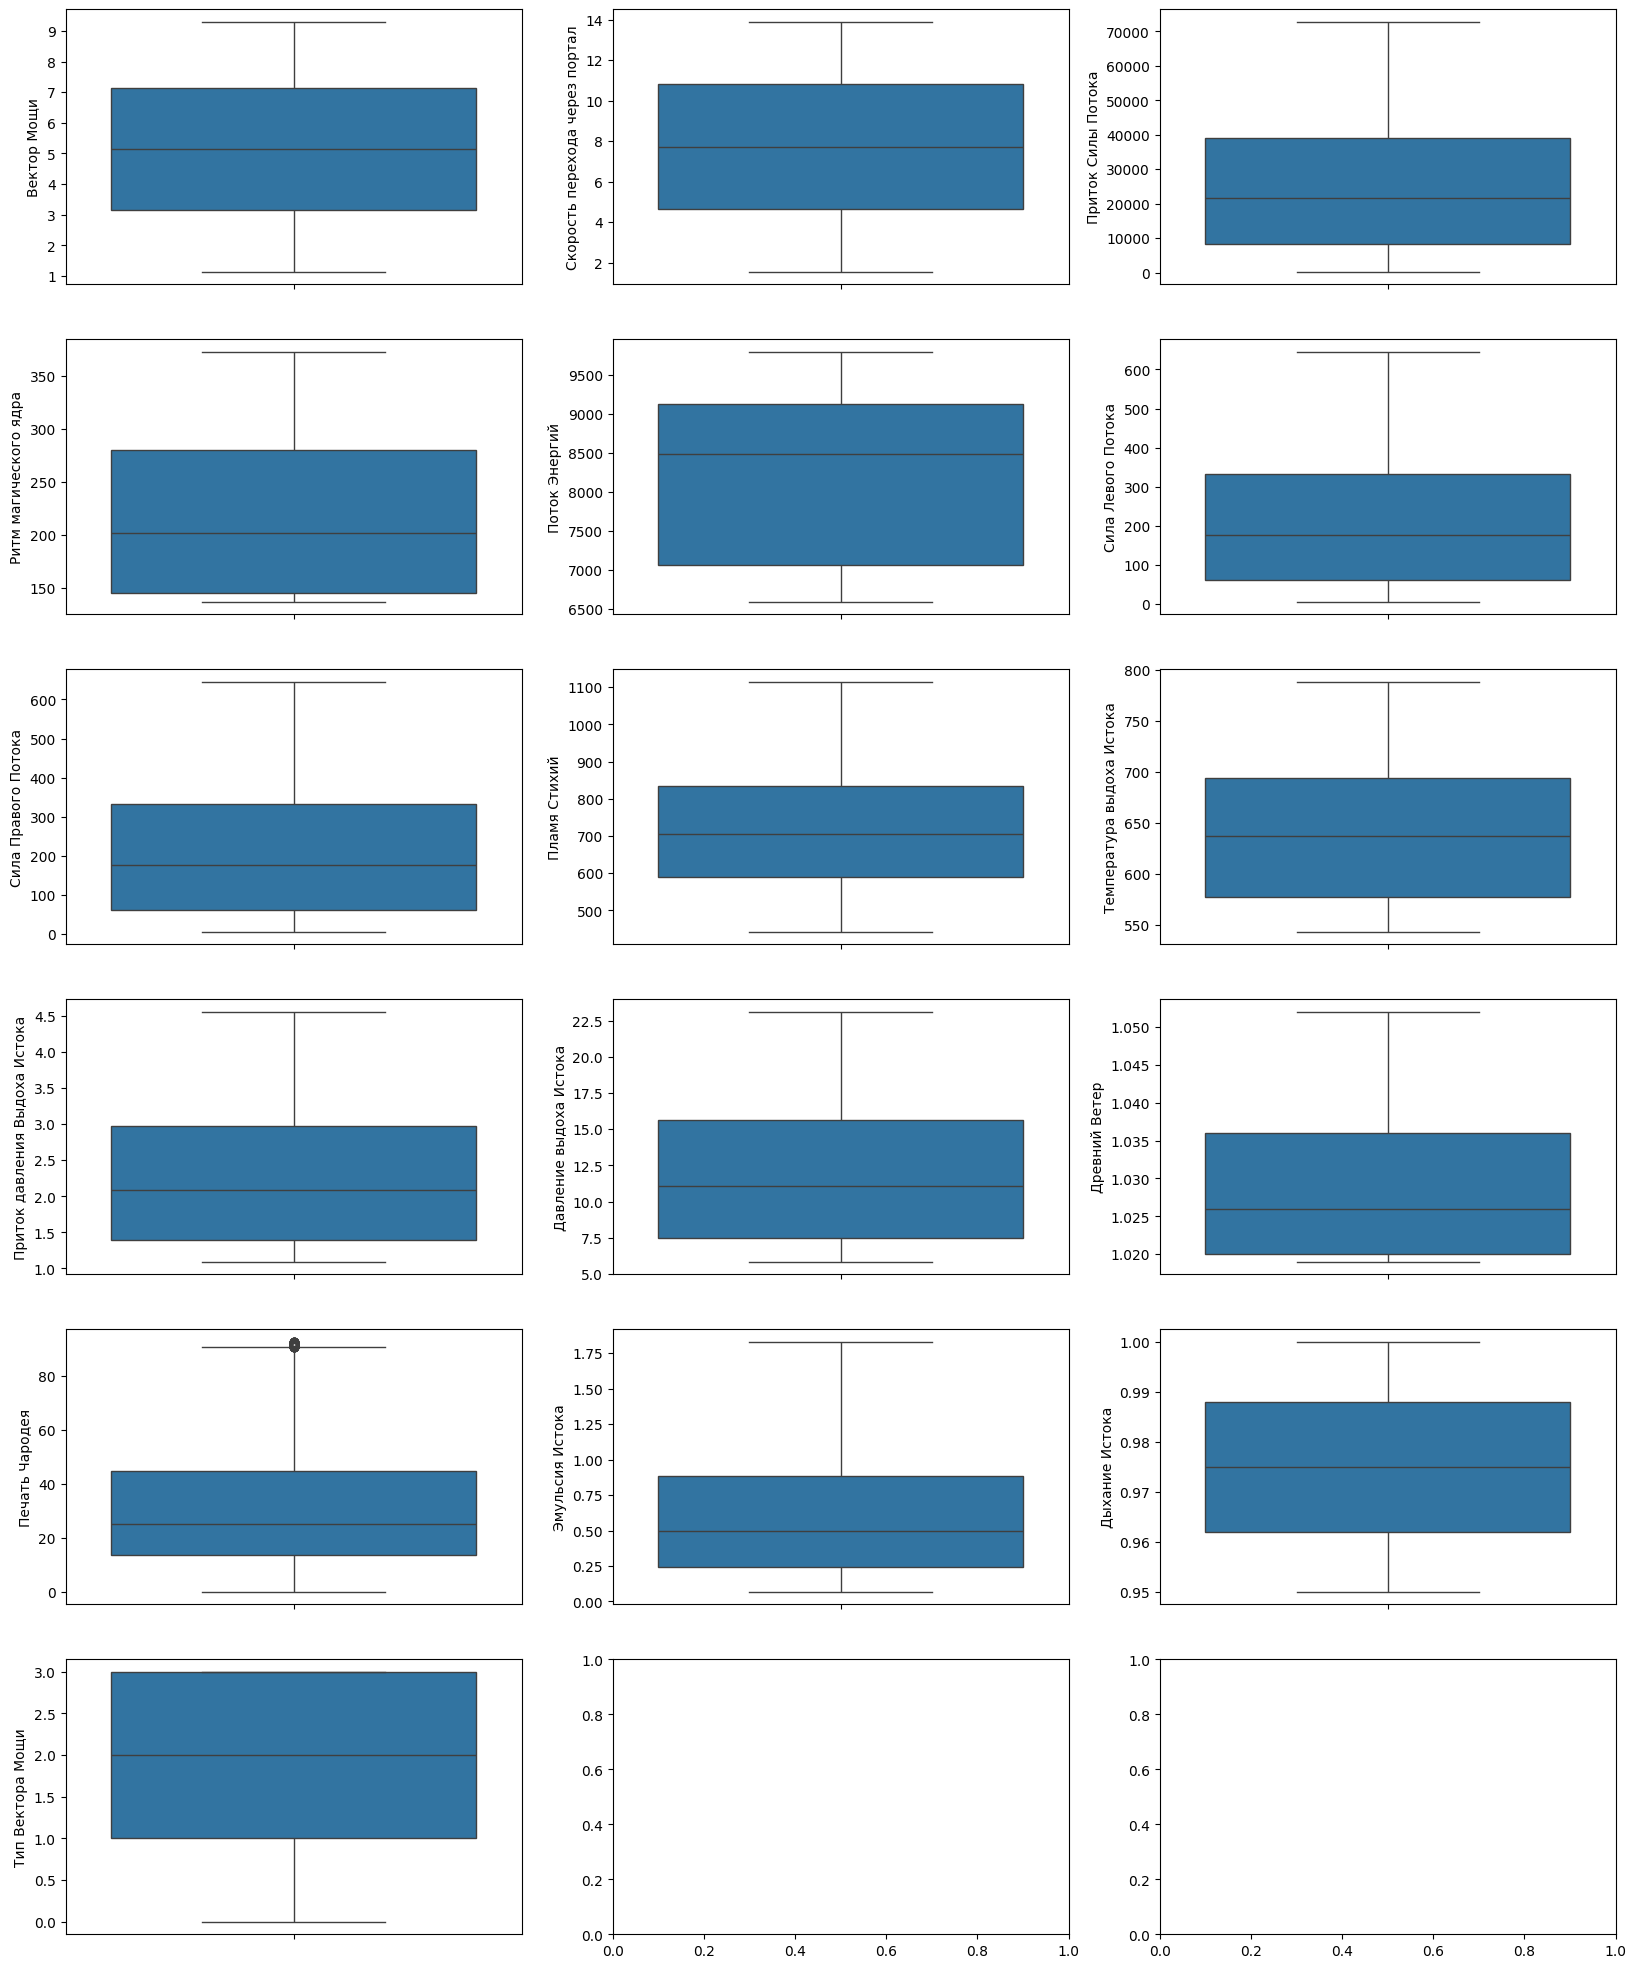

In [354]:
draw_sns(X_train_knn, sns.boxplot, figsize=(20, 25))

По графикам видно, что выбросы присутствуют в признаке `Печать чародея`

### Реализация алгоритма IQR

Функция, возвращающая левую и правую границы IQR

In [355]:
def calc_bounds(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

Функция, возвращающая булев массив, со значениями `False` - выбросов нет, `True` - выбросы есть

In [356]:
def check_feature_outliers_iqr(x: pd.Series):
    lower_bound, upper_bound = calc_bounds(x)
    return ((x < lower_bound) | (x > upper_bound)).values

### Реализация алгоритма Robust Z-Score

In [357]:
def check_feature_outliers_z_score(data, threshold=3.3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    
    normalized_mad = 1.4826 * mad # из свойств нормального распределения
    
    robust_z_scores = (data - median) / normalized_mad
    
    return (np.abs(robust_z_scores) > threshold).values

### Проверка на выбросы

Функция, проверяющая столбцы на наличие выбросов

In [358]:
def check_dataset_outliers(df, outliers_method, **kwargs):
    outliers_flags = [
        outliers_method(df[column], **kwargs) for column in df.columns
    ]
    return np.any(np.array(outliers_flags), axis=0)

Определим строки, содержащие выбросы

In [359]:
outliers_objects_iqr = X_train_knn.loc[check_dataset_outliers(X_train_knn, check_feature_outliers_iqr)]
outliers_objects_iqr

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
620,9.3,13.88988,72774.949,372.848195,9788.415,644.979,644.979,1099.234,785.9230,4.481,22.390,1.0490,90.712,1.796,0.952,3.0
3068,9.3,13.88988,72762.555,372.843064,9764.719,644.784,644.784,1098.829,783.5174,4.511,22.841,1.0498,91.319,1.808,0.963,3.0
1745,9.3,13.88988,72771.424,372.846311,9778.933,645.076,645.076,1097.754,784.6992,4.493,22.556,1.0490,90.838,1.798,0.957,3.0
1889,9.3,13.88988,72762.377,372.842855,9769.808,644.932,644.932,1105.506,785.8806,4.506,22.836,1.0490,91.817,1.818,0.958,3.0
530,9.3,13.88988,72767.398,372.845996,9780.868,645.036,645.036,1108.034,787.0934,4.493,22.660,1.0490,91.758,1.816,0.952,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,9.3,13.88988,72769.109,372.845054,9777.762,645.092,645.092,1101.569,785.7220,4.495,22.631,1.0490,91.231,1.806,0.956,3.0
3104,9.3,13.88988,72766.613,372.844216,9768.017,645.088,645.088,1095.246,783.4380,4.507,22.731,1.0500,90.894,1.799,0.963,3.0
1016,9.3,13.88988,72769.034,372.845682,9780.085,645.074,645.074,1103.906,786.4660,4.493,22.618,1.0490,91.389,1.809,0.954,3.0
161,9.3,13.88988,72775.917,372.848405,9791.421,644.946,644.946,1100.727,786.7550,4.477,22.350,1.0490,90.768,1.797,0.950,3.0


In [360]:
outliers_objects_z_score = X_train_knn.loc[check_dataset_outliers(X_train_knn, check_feature_outliers_z_score)]
outliers_objects_z_score

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
620,9.3,13.88988,72774.949,372.848195,9788.415,644.979,644.979,1099.234,785.9230,4.481,22.390,1.0490,90.712,1.796,0.952,3.0
3068,9.3,13.88988,72762.555,372.843064,9764.719,644.784,644.784,1098.829,783.5174,4.511,22.841,1.0498,91.319,1.808,0.963,3.0
1745,9.3,13.88988,72771.424,372.846311,9778.933,645.076,645.076,1097.754,784.6992,4.493,22.556,1.0490,90.838,1.798,0.957,3.0
1889,9.3,13.88988,72762.377,372.842855,9769.808,644.932,644.932,1105.506,785.8806,4.506,22.836,1.0490,91.817,1.818,0.958,3.0
5210,9.3,13.88988,72765.647,372.843797,9757.547,644.728,644.728,1085.023,780.4062,4.518,22.790,1.0500,90.190,1.785,0.972,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,9.3,13.88988,72782.590,372.879926,9795.105,645.236,645.236,1096.477,786.1170,4.471,22.218,1.0490,90.263,1.787,0.950,3.0
3104,9.3,13.88988,72766.613,372.844216,9768.017,645.088,645.088,1095.246,783.4380,4.507,22.731,1.0500,90.894,1.799,0.963,3.0
1016,9.3,13.88988,72769.034,372.845682,9780.085,645.074,645.074,1103.906,786.4660,4.493,22.618,1.0490,91.389,1.809,0.954,3.0
161,9.3,13.88988,72775.917,372.848405,9791.421,644.946,644.946,1100.727,786.7550,4.477,22.350,1.0490,90.768,1.797,0.950,3.0


### Удаление объектов с выбросами

In [361]:
outliers_objects = np.intersect1d(
    outliers_objects_iqr.index, 
    outliers_objects_z_score.index
)
outliers_objects

array([  26,   44,   53,   62,   71,   89,   98,  116,  125,  134,  143,
        152,  161,  242,  260,  269,  278,  287,  296,  305,  314,  323,
        332,  341,  350,  359,  368,  377,  386,  395,  476,  485,  494,
        503,  512,  521,  530,  539,  548,  557,  566,  575,  584,  593,
        602,  611,  620,  719,  728,  737,  746,  755,  773,  782,  791,
        800,  809,  818,  827,  845,  944,  953,  962,  980,  989,  998,
       1007, 1016, 1025, 1034, 1043, 1052, 1070, 1187, 1196, 1205, 1214,
       1223, 1232, 1241, 1259, 1268, 1286, 1295, 1412, 1439, 1448, 1466,
       1475, 1484, 1493, 1502, 1520, 1529, 1646, 1664, 1673, 1682, 1700,
       1709, 1727, 1736, 1745, 1754, 1880, 1889, 1898, 1907, 1916, 1925,
       1943, 1961, 1970, 1979, 2114, 2123, 2132, 2141, 2159, 2177, 2186,
       2195, 2204, 2366, 2375, 2384, 2393, 2402, 2411, 2429, 2438, 2591,
       2600, 2618, 2636, 2645, 2654, 2663, 2825, 2834, 2843, 2852, 2861,
       2870, 2888, 3050, 3068, 3077, 3086, 3095, 31

In [362]:
outliers_objects.shape

(186,)

Получаем 186 записей-выбросов

Очистим датасет от выбросов

In [363]:
X_train_pure = X_train_knn.drop(outliers_objects)
y_train_pure = y_train.drop(outliers_objects)
X_train_pure
y_train_pure

3685     0.994
5886     0.979
6108     0.977
7713     1.000
3499     0.999
         ...  
5734     0.988
11284    0.980
5191     0.979
860      0.992
7270     0.976
Name: Гармония Бессмертия, Length: 9361, dtype: float64

## Поиск аномалий в данных

Функция пометки аномальных объектов 

In [364]:
def draw_anomaly(X_2d, anomaly_mask):
    plt.scatter(X_2d[:, 0], X_2d[:, 1])
    plt.scatter(X_2d[anomaly_mask, 0], X_2d[anomaly_mask, 1], c="red", marker='x')

Функция для вывода круговой диаграммы

In [365]:
def draw_anomaly_pie(anomaly_mask):
    _, counts = np.unique(anomaly_mask, return_counts=True)

    plt.pie(counts, labels=counts, autopct='%1.0f%%');
    plt.legend([
        'Нормальные объекты', 'Аномалии'
    ], loc='lower right');

Понизим пространство до двумерного

In [366]:
from umap.umap_ import UMAP

X_2d = UMAP().fit_transform(X_train_pure)

d:\PythonWork\OldZmiy\NLPWork\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


### Поиск на основе IsolationForest

In [367]:
from pyod.models.iforest import IForest


isf = IForest().fit(X_train_pure)
isf_anomaly = isf.predict(X_train_pure)

d:\PythonWork\OldZmiy\NLPWork\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


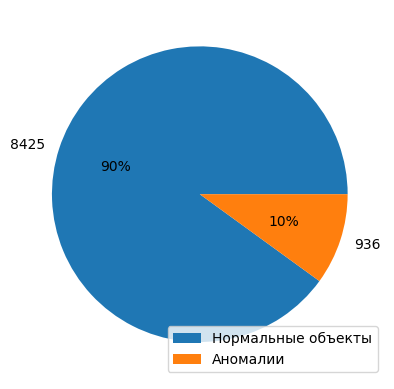

In [368]:
draw_anomaly_pie(isf_anomaly)

Данный алгоритм посчитал 936 объектов аномальными.

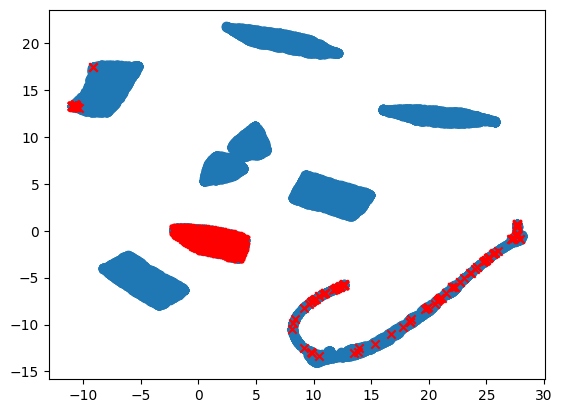

In [369]:
draw_anomaly(X_2d, isf_anomaly.astype(bool))

Заметим, что алгоритм отметил два "острова" слева снизу

### Поиск на основе OCSVM

In [370]:
from pyod.models.ocsvm import OCSVM


ocsvm = OCSVM().fit(X_train_pure)
ocsvm_anomaly = ocsvm.predict(X_train_pure)

d:\PythonWork\OldZmiy\NLPWork\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


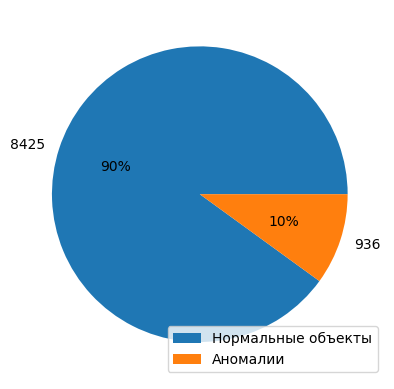

In [371]:
draw_anomaly_pie(ocsvm_anomaly)

Данный алгоритм посчитал также 936 объектов аномальными.

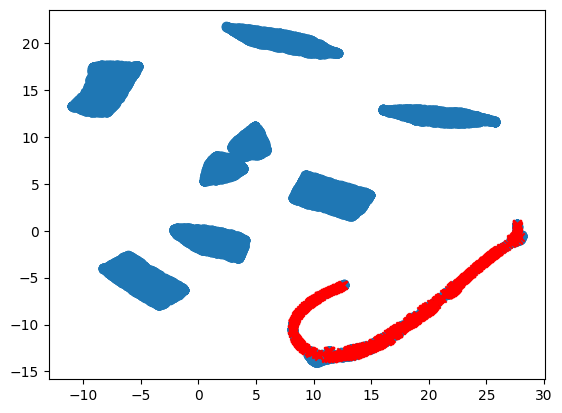

In [372]:
draw_anomaly(X_2d, ocsvm_anomaly.astype(bool))

Заметим, что алгоритм отметил два "длинных острова" снизу

### Поиск на основе плотностного алгоритма

In [373]:
from pyod.models.lof import LOF

lf = LOF().fit(X_train_pure)
lf_anomaly = lf.predict(X_train_pure)

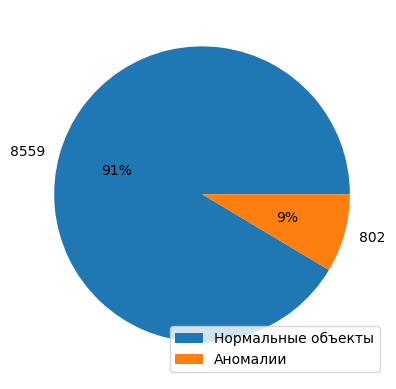

In [374]:
draw_anomaly_pie(lf_anomaly)

Данный алгоритм посчитал 802 объекта аномальными.

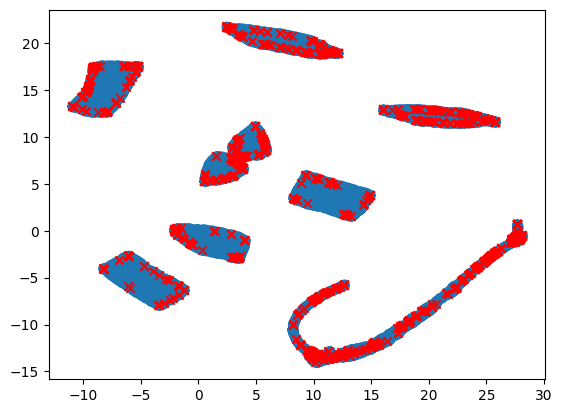

In [375]:
draw_anomaly(X_2d, lf_anomaly.astype(bool))

Заметим, что алгоритм обвел каждый из "островов"

## Удаление аномальных объектов

Возьмем только те аномалии, которые выбрали все три алгоритма

In [376]:
anomalies = np.all(np.array([
    isf_anomaly,
    ocsvm_anomaly,
    lf_anomaly
]), axis=0)
anomalies

array([False, False, False, ..., False, False, False])

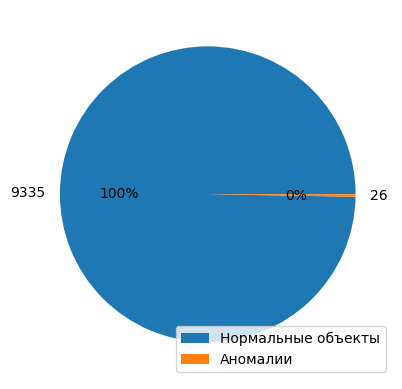

In [377]:
draw_anomaly_pie(anomalies)

Вышло 26 аномалий

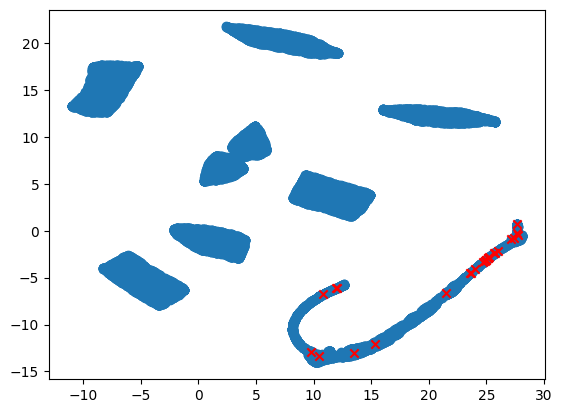

In [378]:
draw_anomaly(X_2d, anomalies)

In [379]:
anomaly_index = X_train_pure.loc[anomalies].index
anomaly_index

Index([ 567,  594,  837,  603,  828, 1287, 2358, 2970, 3555, 1332,  378, 1755,
       1782,  297,   90, 3924, 1881, 2259, 2016,  342,  423, 1638,  207, 1521,
         54,  189],
      dtype='int64')

In [380]:
X_train_pure = X_train_pure.drop(anomaly_index)
y_train_pure = y_train_pure.drop(anomaly_index)
X_train_pure.shape
y_train_pure

3685     0.994
5886     0.979
6108     0.977
7713     1.000
3499     0.999
         ...  
5734     0.988
11284    0.980
5191     0.979
860      0.992
7270     0.976
Name: Гармония Бессмертия, Length: 9335, dtype: float64

In [381]:
X_test_pure = X_test_knn
y_test_pure = y_test_aligned

## 1.7. Подведение итогов раздела 1 <a class="anchor" id="section_1_7"></a> [↑](#toc)
<!-- А таких разделах обычно подытоживается вся информация о тех действиях, которые вы делали в разделе -->

Таким образом, пропуски в данных были заполнены, а выбросы удалены. Датасет был предварительно подготовлены для дальнейшей работы. 

# 2. Генерация новых признаков <a class="anchor" id="chapter2"></a> [↑](#toc)

## 2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции) <a class="anchor" id="section_2_1"></a> [↑](#toc)

Построим тепловую карту признаков

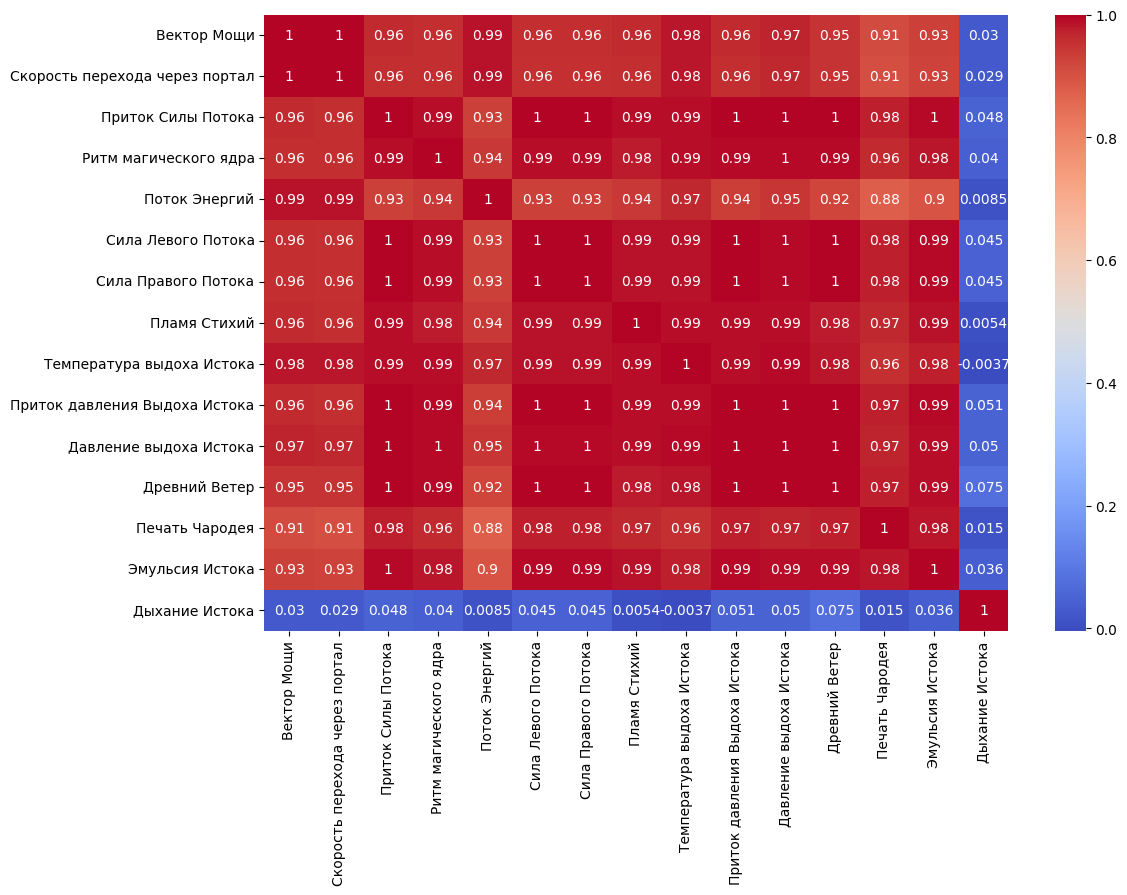

In [382]:
corr = X_train_pure.drop(['Тип Вектора Мощи'], axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## 2.2. Исправление проблемы мультиколлинеарности в данных <a class="anchor" id="section_2_2"></a> [↑](#toc)

Вспомним допустимые в прикладной области формулы и устраним с их помощью проблему мультиколлинеарности в данных

<b>Совокупная мощность потоков</b>

$f_{sum} = f_{left} + f_{right} + f_c$

Где

$f_{sum}$ - Совокупная мощность потоков

$f_{left}$ - Сила левого потока

$f_{right}$ - Сила правого потока

$f_c$ - Приток силы потоков

<br>

In [383]:
X_train_pure['Совокупная мощность потоков'] = X_train_pure['Сила Левого Потока'] + \
                                                X_train_pure['Сила Правого Потока'] + \
                                                    X_train_pure['Приток Силы Потока']
                                                    
X_test_pure['Совокупная мощность потоков'] = X_test_pure['Сила Левого Потока'] + \
                                                X_test_pure['Сила Правого Потока'] + \
                                                    X_test_pure['Приток Силы Потока']                                                    
                                                    
X_train_pure['Совокупная мощность потоков'] 

3685     21985.465
5886      2719.238
6108     39662.798
7713      6781.756
3499     51870.279
           ...    
5734      3657.722
11284    51865.526
5191     51869.728
860      30289.777
7270     51865.448
Name: Совокупная мощность потоков, Length: 9335, dtype: float64

<b>Общая сила ядра</b>

$k_{sum} = r * f_c$

Где

$k_{sum}$ - Общая сила ядра

$r$ - Ритм магического ядра

$f_c$ - Приток силы потоков


<br>

In [384]:
X_train_pure['Общая сила ядра'] = X_train_pure['Ритм магического ядра'] * X_train_pure['Приток Силы Потока']
                                                    
X_test_pure['Общая сила ядра'] = X_test_pure['Ритм магического ядра'] * X_test_pure['Приток Силы Потока']                                                
                                                    
X_train_pure['Общая сила ядра'] 

3685     4.359787e+06
5886     3.761400e+05
6108     1.093685e+07
7713     9.791635e+05
3499     1.648763e+07
             ...     
5734     5.217927e+05
11284    1.648499e+07
5191     1.648724e+07
860      7.199420e+06
7270     1.648489e+07
Name: Общая сила ядра, Length: 9335, dtype: float64

<b>Общее давление</b>

$P_{sum} = P_{out} + \Delta P$

Где

$P_{sum}$ - Общее давление

$P_{out}$ - Давление Выдоха Истока

$\Delta P$ - Приток давления Выдоха Истока

<br>

In [385]:
X_train_pure['Общее Давление'] = X_train_pure['Давление выдоха Истока'] + X_train_pure['Приток давления Выдоха Истока']
                                                    
X_test_pure['Общее Давление'] = X_test_pure['Давление выдоха Истока'] + X_test_pure['Приток давления Выдоха Истока']                                            
                                                    
X_train_pure['Общее Давление'] 

3685     13.082
5886      7.634
6108     18.710
7713      8.400
3499     21.746
          ...  
5734      7.834
11284    22.300
5191     22.210
860      15.626
7270     22.313
Name: Общее Давление, Length: 9335, dtype: float64

<b>Магическая производительность</b>

$V = \frac{v}{e}$

Где

$V$ - Магическая производительность

$v$ - Скорость перехода через портал

$e$ - Эмульсия истока


<br>

In [386]:
X_train_pure['Магическая производительность'] = X_train_pure['Скорость перехода через портал'] / X_train_pure['Эмульсия Истока']
                                                    
X_test_pure['Магическая производительность'] = X_test_pure['Скорость перехода через портал'] / X_test_pure['Эмульсия Истока']                                         
                                                    
X_train_pure['Магическая производительность'] 

3685     15.620648
5886      7.955258
6108     12.179526
7713      5.551511
3499     10.472061
           ...    
5734     21.584895
11284    10.383987
5191     10.195343
860      13.577595
7270     10.203769
Name: Магическая производительность, Length: 9335, dtype: float64

<b>Эффективность ядра</b>

$E_k = \frac{k_{sum}}{e}$

Где

$E_k$ - Эффективность ядра

$k_{sum}$ - Общая сила ядра

$e$ - Эмульсия истока


<br>

In [387]:
X_train_pure['Эффективность ядра'] = X_train_pure['Общая сила ядра'] / X_train_pure['Эмульсия Истока']
                                                    
X_test_pure['Эффективность ядра'] = X_test_pure['Общая сила ядра'] / X_test_pure['Эмульсия Истока']                                         
                                                    
X_train_pure['Эффективность ядра'] 

3685     8.825480e+06
5886     1.938866e+06
6108     1.233015e+07
7713     3.522171e+06
3499     1.398442e+07
             ...     
5734     3.648900e+06
11284    1.386458e+07
5191     1.361457e+07
860      1.055633e+07
7270     1.362387e+07
Name: Эффективность ядра, Length: 9335, dtype: float64

Удалим столбцы:

- `Сила Левого Потока`
- `Сила Правого Потока`
- `Приток Силы потока`
- `Давление выдоха Истока`
- `Приток давления Выдоха Истока`
- `Скорость перехода через портал`
- `Эмульсия Истока`
- `Общая сила ядра`

In [388]:
X_train_new_feat = X_train_pure.drop(['Сила Левого Потока', 'Сила Правого Потока', 'Приток Силы Потока',
                                    'Давление выдоха Истока', 'Приток давления Выдоха Истока', 
                                    'Скорость перехода через портал', 'Эмульсия Истока', 'Общая сила ядра'], axis=1)

X_test_new_feat = X_test_pure.drop(['Сила Левого Потока', 'Сила Правого Потока', 'Приток Силы Потока',
                                     'Давление выдоха Истока', 'Приток давления Выдоха Истока', 
                                    'Скорость перехода через портал', 'Эмульсия Истока', 'Общая сила ядра'], axis=1)

X_train_new_feat

,Вектор Мощи,Ритм магического ядра,Поток Энергий,Пламя Стихий,Температура выдоха Истока,Древний Ветер,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Совокупная мощность потоков,Общее Давление,Магическая производительность,Эффективность ядра
3685,5.140,201.516309,8497.497,704.972,638.3876,1.026,24.951,0.965,2.0,21985.465,13.082,15.620648,8.825480e+06
5886,1.138,138.966361,6622.351,545.800,554.5726,1.019,26.222,0.975,0.0,2719.238,7.634,7.955258,1.938866e+06
6108,7.148,280.444531,9120.644,835.034,691.4946,1.035,44.789,0.976,3.0,39662.798,18.710,12.179526,1.233015e+07
7713,1.138,144.782287,6697.636,620.925,573.7978,1.019,0.000,0.982,0.0,6781.756,8.400,5.551511,3.522171e+06
3499,8.206,323.324443,9319.460,917.854,733.6684,1.041,59.577,0.964,3.0,51870.279,21.746,10.472061,1.398442e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2.088,145.007435,6812.997,515.378,561.5860,1.020,0.000,0.974,0.0,3657.722,7.834,21.584895,3.648900e+06
11284,8.206,323.300567,9292.800,915.018,725.9730,1.042,60.083,0.998,3.0,51865.526,22.300,10.383987,1.386458e+07
5191,8.206,323.319312,9306.729,933.160,734.0560,1.041,61.190,0.972,3.0,51869.728,22.210,10.195343,1.361457e+07
860,6.175,241.615179,8842.649,779.989,671.8760,1.030,34.453,0.953,2.0,30289.777,15.626,13.577595,1.055633e+07


Выведем тепловую карту для нового датасета

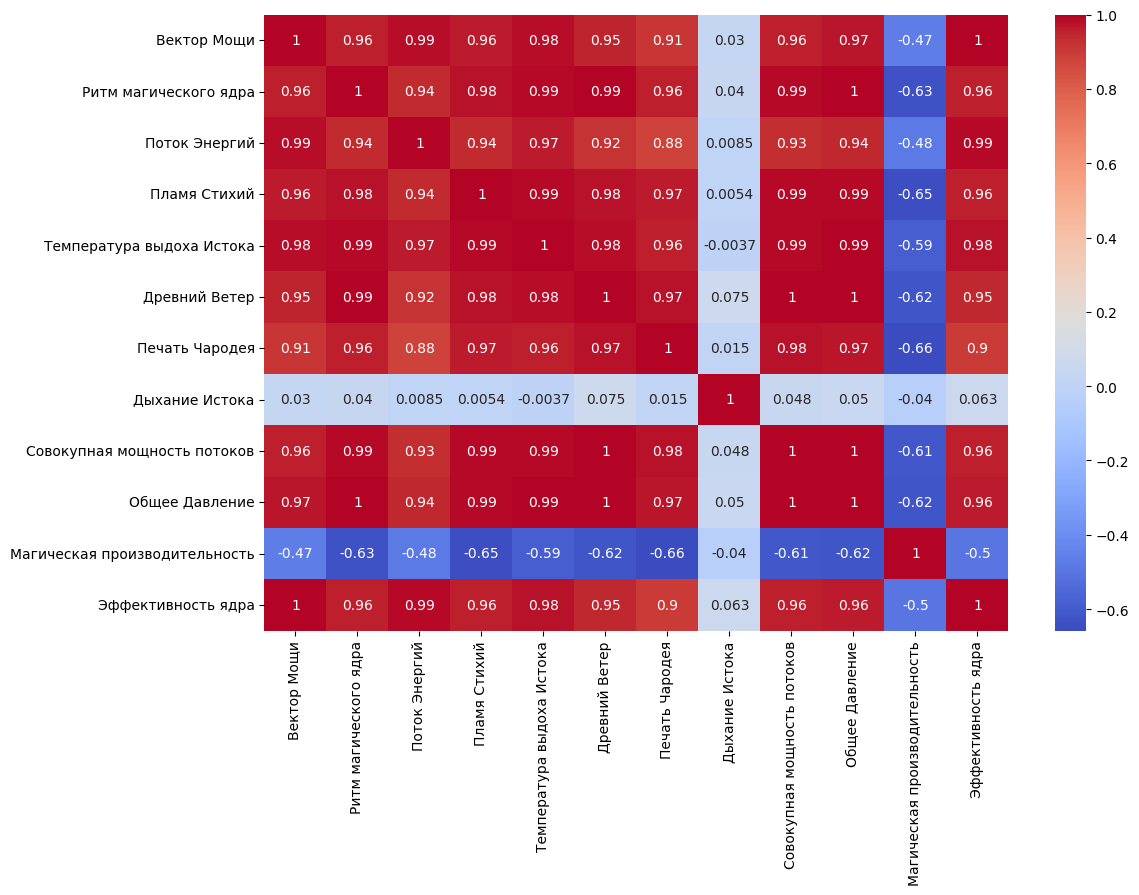

In [389]:
corr = X_train_new_feat.drop(['Тип Вектора Мощи'], axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Проблема мультиколлинеарности решена лишь частично

Исследуем проблему диспропорции значений признаков

In [390]:
X_train_new_feat.describe()

,Вектор Мощи,Ритм магического ядра,Поток Энергий,Пламя Стихий,Температура выдоха Истока,Древний Ветер,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Совокупная мощность потоков,Общее Давление,Магическая производительность,Эффективность ядра
count,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9.335000e+03
mean,5.085813,220.729427,8169.690508,727.952993,643.361467,1.029086,32.489907,0.975467,1.639314,26780.577594,14.399222,13.974891,8.656335e+06
std,2.584584,79.099119,1078.997191,167.732193,70.727252,0.010112,24.790159,0.014624,1.151971,21814.906139,6.237876,4.218455,4.357803e+06
min,1.138000,136.939406,6589.002000,442.364000,542.994000,1.019000,0.000000,0.950000,0.000000,267.547000,6.924000,4.566036,4.373923e+05
25%,3.144000,145.220853,7051.451000,588.892000,577.282200,1.020000,13.021500,0.963000,1.000000,8496.146000,8.829000,10.480951,4.904247e+06
50%,5.140000,201.514633,8477.636000,703.337000,636.061000,1.026000,25.123000,0.976000,2.000000,21979.580000,13.142000,13.677873,8.736035e+06
75%,7.148000,280.447463,9129.255500,829.382000,691.721300,1.036000,44.239500,0.988000,3.000000,39661.261500,18.572500,17.945581,1.263086e+07
max,9.300000,372.879926,9797.103000,1099.863000,786.295200,1.052000,90.689000,1.000000,3.000000,74075.284000,27.691000,25.094634,1.592358e+07


Заметим, что диспропорция - налицо! Например, у `Совокупная мощность потоков` стандартное отклонение = 21810, а у `Эффективность ядра` - всего лишь $4 * 10^{-6}$


Поэтому будет целесообразно применить скалирование данных

## 2.3. Скалирование данных <a class="anchor" id="section_2_3"></a> [↑](#toc)

#### Стандартизация

In [391]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new_feat)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_new_feat.columns, index=X_train_new_feat.index)
X_test_scaled = scaler.transform(X_test_new_feat)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_new_feat.columns, index=X_test_new_feat.index)
X_train_scaled

,Вектор Мощи,Ритм магического ядра,Поток Энергий,Пламя Стихий,Температура выдоха Истока,Древний Ветер,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Совокупная мощность потоков,Общее Давление,Магическая производительность,Эффективность ядра
3685,0.020967,-0.242912,0.303823,-0.137017,-0.070328,-0.305187,-0.304125,-0.715796,0.313120,-0.219821,-0.211176,0.390153,0.038816
5886,-1.527528,-1.033734,-1.434130,-1.086033,-1.255437,-0.997485,-0.252852,-0.031968,-1.423128,-1.103036,-1.084597,-1.427052,-1.541563
6108,0.797922,0.754981,0.881378,0.638439,0.680582,0.584910,0.496155,0.036415,1.181243,0.590555,0.691102,-0.425620,0.843089
7713,-1.527528,-0.960203,-1.364353,-0.638123,-0.983601,-0.997485,-1.310667,0.446712,-1.423128,-0.916799,-0.961793,-1.996899,-1.178217
3499,1.207295,1.297113,1.065648,1.132229,1.276902,1.178308,1.092714,-0.784179,1.181243,1.150179,1.177832,-0.830403,1.222719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-1.159944,-0.957356,-1.257433,-1.267415,-1.156271,-0.898586,-1.310667,-0.100351,-1.423128,-1.060013,-1.052533,1.804075,-1.149135
11284,1.207295,1.296811,1.040938,1.115320,1.168092,1.277208,1.113126,1.540837,1.181243,1.149961,1.266649,-0.851282,1.195219
5191,1.207295,1.297048,1.053848,1.223486,1.282383,1.178308,1.157783,-0.237117,1.181243,1.150154,1.252221,-0.896003,1.137844
860,0.421439,0.264059,0.623722,0.310249,0.403183,0.090411,0.079193,-1.536391,0.313120,0.160871,0.196677,-0.094185,0.436023


#### MinMax-преобразование

In [392]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_train_minmax = mmscaler.fit_transform(X_train_new_feat)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train_new_feat.columns, index=X_train_new_feat.index)
X_test_minmax = mmscaler.transform(X_test_new_feat)
X_test_minmax = pd.DataFrame(X_test_scaled, columns=X_test_new_feat.columns, index=X_test_new_feat.index)
X_train_minmax

,Вектор Мощи,Ритм магического ядра,Поток Энергий,Пламя Стихий,Температура выдоха Истока,Древний Ветер,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Совокупная мощность потоков,Общее Давление,Магическая производительность,Эффективность ядра
3685,0.490321,0.273700,0.594899,0.399404,0.392080,0.212121,0.275127,0.30,0.666667,0.294250,0.296528,0.538498,0.541649
5886,0.000000,0.008591,0.010395,0.157317,0.047590,0.000000,0.289142,0.50,0.000000,0.033217,0.034189,0.165098,0.096956
6108,0.736339,0.608226,0.789140,0.597218,0.610357,0.484848,0.493875,0.52,1.000000,0.533755,0.567535,0.370872,0.767959
7713,0.000000,0.033241,0.033862,0.271576,0.126608,0.000000,0.000000,0.64,0.000000,0.088259,0.071074,0.048005,0.199195
3499,0.865964,0.789966,0.851113,0.723180,0.783697,0.666667,0.656937,0.28,1.000000,0.699151,0.713729,0.287697,0.874781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.116393,0.034195,0.069822,0.111048,0.076416,0.030303,0.000000,0.48,0.000000,0.045933,0.043820,0.829032,0.207379
11284,0.865964,0.789865,0.842803,0.718866,0.752068,0.696970,0.662517,0.96,1.000000,0.699086,0.740405,0.283407,0.867043
5191,0.865964,0.789944,0.847145,0.746459,0.785290,0.666667,0.674724,0.44,1.000000,0.699143,0.736072,0.274218,0.850899
860,0.617128,0.443653,0.702486,0.513499,0.529722,0.333333,0.379903,0.06,0.666667,0.406763,0.419030,0.438976,0.653417


#### Робастное преобразование

In [393]:
from sklearn.preprocessing import RobustScaler

rscaler = RobustScaler()
X_train_robust = rscaler.fit_transform(X_train_new_feat)
X_train_robust = pd.DataFrame(X_train_robust, columns=X_train_new_feat.columns, index=X_train_new_feat.index)
X_test_robust = rscaler.transform(X_test_new_feat)
X_test_robust = pd.DataFrame(X_test_robust, columns=X_test_new_feat.columns, index=X_test_new_feat.index)
X_train_robust

,Вектор Мощи,Ритм магического ядра,Поток Энергий,Пламя Стихий,Температура выдоха Истока,Древний Ветер,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Совокупная мощность потоков,Общее Давление,Магическая производительность,Эффективность ядра
3685,0.000000,0.000012,0.009559,0.006799,0.020330,0.0000,-0.005510,-0.44,0.0,0.000189,-0.006158,0.260264,0.011576
5886,-0.999500,-0.462544,-0.892906,-0.655067,-0.712068,-0.4375,0.035204,-0.04,-1.0,-0.618010,-0.565300,-0.766631,-0.879708
6108,0.501499,0.583686,0.309465,0.547619,0.484394,0.5625,0.629957,0.00,0.5,0.567404,0.571458,-0.200726,0.465161
7713,-0.999500,-0.419535,-0.856673,-0.342684,-0.544073,-0.4375,-0.804760,0.24,-1.0,-0.487655,-0.486683,-1.088649,-0.674793
3499,0.765734,0.900783,0.405151,0.892000,0.852920,0.9375,1.103658,-0.48,0.5,0.959108,0.883050,-0.429467,0.679260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.762238,-0.417870,-0.801153,-0.781567,-0.650783,-0.3750,-0.804760,-0.08,-1.0,-0.587896,-0.544773,1.059265,-0.658391
11284,0.765734,0.900606,0.392320,0.880207,0.785676,1.0000,1.119867,0.88,0.5,0.958955,0.939909,-0.441266,0.663751
5191,0.765734,0.900745,0.399024,0.955645,0.856307,0.9375,1.155327,-0.16,0.5,0.959090,0.930672,-0.466538,0.631393
860,0.258492,0.296543,0.175672,0.318733,0.312961,0.2500,0.298866,-0.92,0.0,0.266651,0.254939,-0.013434,0.235588


## 2.4. Подведение итогов раздела 2 <a class="anchor" id="section_2_4"></a> [↑](#toc)
<!-- А таких разделах обычно подытоживается вся информация о тех действиях, которые вы делали в разделе -->

Благодаря введению новых признаков, выводимых из формул прикладной области, была уменьшена мультиколлинеарность в данных. С помощью скалирования выровнено стандартное отклонение признаков.

# 3. Выбор моделей ML и метрик <a class="anchor" id="chapter3"></a> [↑](#toc)

Рассмотрим корреляции с целевым признаком

C:\Users\sheld\AppData\Local\Temp\ipykernel_21020\2154723023.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


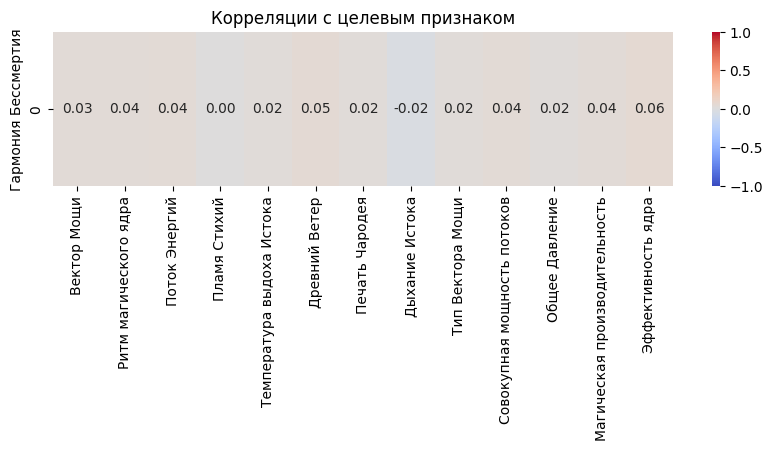

In [421]:
corr_with_target = X_train_new_feat.corrwith(y_train_pure)
heatmap = pd.DataFrame(corr_with_target).T

plt.figure(figsize=(10, 2))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Корреляции с целевым признаком')
plt.ylabel('Гармония Бессмертия')
plt.tight_layout()
plt.show()

Корреляции между признаками и целевой переменной практически нет

### Графики рассеяния

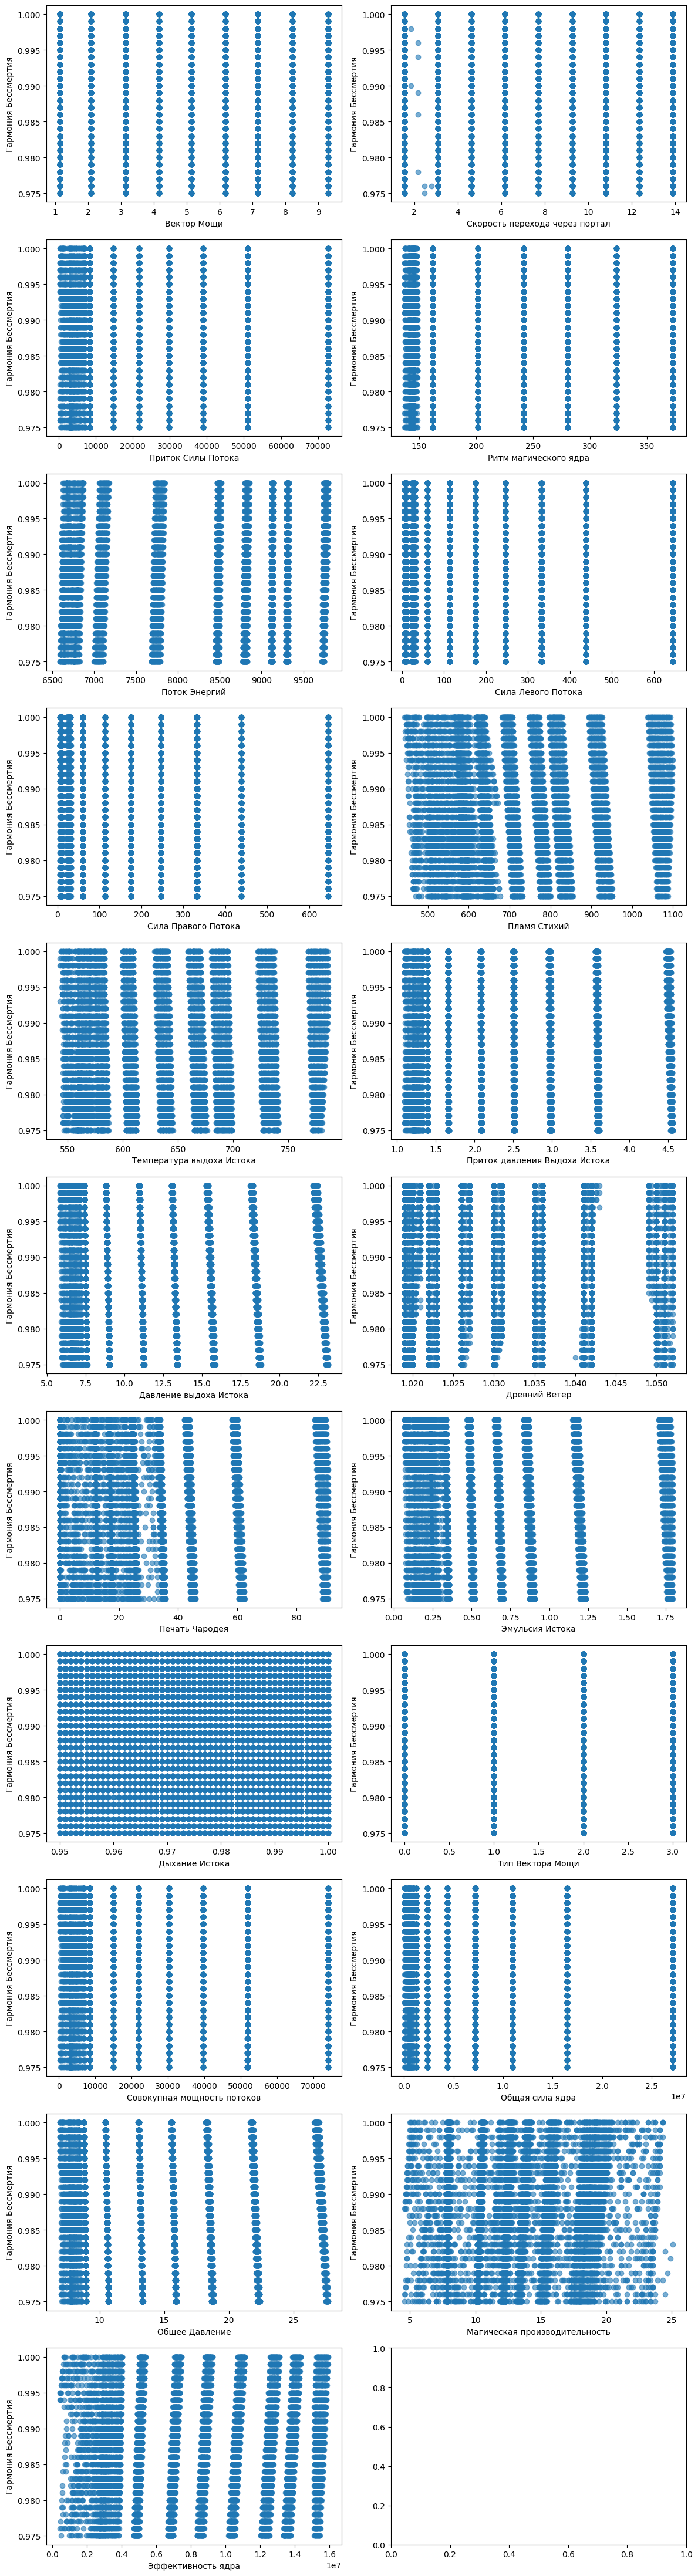

In [395]:
import matplotlib.pyplot as plt

features = X_train_pure.columns
target = y_train_pure

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten() 

for idx, feature in enumerate(features):
    axes[idx].scatter(X_train_pure[feature], y_train_pure, alpha=0.6)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Гармония Бессмертия')

plt.tight_layout()
plt.show()


Заметим, что линейных зависимостей нет

Из-за нелинейных зависимостей, очень малых корреляций с целевым признаком, небольшим размером признакового пространства и выборки воспользуемся моделями с невысокой алгоритмической сложностью:

* `Decision Tree Regressor` (строит иерархическую структуру правил «если-то» путем рекурсивного разбиения пространства признаков на области, чтобы минимизировать дисперсию целевой переменной в каждом листе)
* `Random Forest Regressor` (обучает множество независимых глубоких деревьев на случайных подвыборках данных и признаков, а итоговое предсказание формирует путем усреднения ответов всех деревьев для снижения разброса)
* `Gradient Boosting Regressor` ( строит ансамбль деревьев последовательно, где каждая новая модель обучается корректировать ошибки - антиградиент функции потерь - композиции всех предыдущих моделей)

Выберем следующий пул метрик для оценки качества моделей:

* `MAE` (для удобства интерпретации)
* `MSE` (для штрафования больших ошибок)
* `MAPE` (для относительного сравнения моделей)
* `R^2` (для проверки соответствия реальным данным)

### Метрики качества регрессии

Обозначения:
* $y_i$ - истинное значение целевой переменной для $i$-го объекта.
* $\hat{y}_i$ - предсказанное значение модели для $i$-го объекта.
* $\bar{y}$ - среднее значение истинной целевой переменной.
* $n$ - количество объектов в выборке.

#### 1. Mean Absolute Error (MAE)

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

#### 2. Mean Squared Error (MSE)

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

#### 3. Mean Absolute Percentage Error (MAPE)

$$ MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $$

#### 4. Коэффициент детерминации ($R^2$)

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


В качестве целевой метрики для подбора гиперпараметров моделей используем `MSE` для наиболее явного понимания ошибки

Сформируем сетки гиперпараметров для каждой модели

In [396]:
dtr_params = {
    'max_depth': ('int', [3, 7]),
    'criterion': ('cat', ['squared_error', 'absolute_error', 'poisson']),
    'min_samples_split': ('int', [2, 10])
}

In [397]:
rf_params = {
    'n_estimators': ('cat', [50, 100, 300]),
    'max_depth': ('int', [3, 7]),
    'min_samples_split': ('int', [2, 10])
}

In [398]:
gbr_params = {
    'n_estimators': ('cat', [50, 100, 300]),
    'max_depth': ('int', [3, 7]),
    'min_samples_split': ('int', [2, 10]),
    'loss': ('cat', ['squared_error', 'absolute_error', 'huber', 'quantile'])
}

"Обертка" над optuna

In [399]:
import optuna
from sklearn.model_selection import cross_val_score


def gen_objective(estimator_class, grid, X_train, y_train, **kwargs):
    def objective(trial):
        params = {}
        for k, v in grid.items():
            if v[0] == 'cat':
                params[k] = trial.suggest_categorical(k, v[1])
            elif v[0] == 'int':
                params[k] = trial.suggest_int(k, *v[1])
            elif v[0] == 'float':
                params[k] = trial.suggest_float(k, *v[1], log=True)
      
        regressor = estimator_class(**params)
    
        mse_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 
        return -mse_scores.mean()

    return objective

def get_best_params(X, y, model, params):
    my_objective = gen_objective(model, params, X, y)
    study = optuna.create_study(direction="minimize")
    study.optimize(my_objective, n_trials=10)
    return study.best_params


In [400]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

Функция, определяющая метрики модели

In [401]:
def get_metrics(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model_name, {'MAE': mae, 'MSE': mse, 'MAPE': mape, 'R2': r2}

Данные для таблицы метрик будем хранить в словаре

In [402]:
metdct = {}

# 4. Обучение моделей ML и подбор гиперпараметров <a class="anchor" id="chapter4"></a> [↑](#toc)

Для датасета `new_feat`

1. `Decision Tree Regressor`

In [403]:
X_train_new_feat.shape

(9335, 13)

In [404]:
X_train_pure.shape

(9335, 21)

In [405]:
y_train_pure.shape

(9335,)

In [406]:
y_train_aligned

3685     0.994
5886     0.979
6108     0.977
7713     1.000
3499     0.999
         ...  
11284    0.980
5191     0.979
5390     0.975
860      0.992
7270     0.976
Name: Гармония Бессмертия, Length: 9547, dtype: float64

In [408]:
from sklearn.tree import DecisionTreeRegressor

new_feat_dtr = DecisionTreeRegressor(**get_best_params(X_train_new_feat, y_train_pure, DecisionTreeRegressor, dtr_params))
new_feat_dtr.fit(X_train_new_feat, y_train_pure)
y_pr = new_feat_dtr.predict(X_test_new_feat)
name, vals = mtrs = get_metrics('new_feat - DTR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-19 23:41:32,029] A new study created in memory with name: no-name-7f684d2f-2597-44ea-836f-8a10eaa32011
[I 2025-12-19 23:41:53,387] Trial 0 finished with value: 3.576992501339053e-05 and parameters: {'max_depth': 5, 'criterion': 'absolute_error', 'min_samples_split': 6}. Best is trial 0 with value: 3.576992501339053e-05.
[I 2025-12-19 23:42:10,656] Trial 1 finished with value: 4.215457953936806e-05 and parameters: {'max_depth': 4, 'criterion': 'absolute_error', 'min_samples_split': 2}. Best is trial 0 with value: 3.576992501339053e-05.
[I 2025-12-19 23:42:10,862] Trial 2 finished with value: 3.5204555284985924e-05 and parameters: {'max_depth': 5, 'criterion': 'poisson', 'min_samples_split': 5}. Best is trial 2 with value: 3.5204555284985924e-05.
[I 2025-12-19 23:42:11,034] Trial 3 finished with value: 4.615483647682214e-05 and parameters: {'max_depth': 3, 'criterion': 'squared_error', 'min_samples_split': 8}. Best is trial 2 with value: 3.5204555284985924e-05.
[I 2025-12-19 2

('new_feat - DTR',
 {'MAE': 0.0034802590853583904,
  'MSE': 2.220077335182616e-05,
  'MAPE': 0.003524935097093809,
  'R2': 0.6104014238237447})

2. `Random Forest Regressor`

In [409]:
from sklearn.ensemble import RandomForestRegressor

new_feat_rf = RandomForestRegressor(**get_best_params(X_train_new_feat, y_train_pure, RandomForestRegressor, rf_params))
new_feat_rf.fit(X_train_new_feat, y_train_pure)
y_pr = new_feat_rf.predict(X_test_new_feat)
name, vals = mtrs = get_metrics('new_feat - RF', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-19 23:42:40,759] A new study created in memory with name: no-name-ad7ffc8b-4df6-44fa-8a9e-7e075e4771a5
[I 2025-12-19 23:43:03,337] Trial 0 finished with value: 4.578567233179035e-05 and parameters: {'n_estimators': 300, 'max_depth': 3, 'min_samples_split': 2}. Best is trial 0 with value: 4.578567233179035e-05.
[I 2025-12-19 23:43:35,897] Trial 1 finished with value: 3.395539914228264e-05 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 1 with value: 3.395539914228264e-05.
[I 2025-12-19 23:43:46,621] Trial 2 finished with value: 3.3965081024243275e-05 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 1 with value: 3.395539914228264e-05.
[I 2025-12-19 23:43:54,239] Trial 3 finished with value: 2.1448999958190617e-05 and parameters: {'n_estimators': 50, 'max_depth': 7, 'min_samples_split': 7}. Best is trial 3 with value: 2.1448999958190617e-05.
[I 2025-12-19 23:43:57,765] Trial 4 finished wi

('new_feat - RF',
 {'MAE': 0.00324114078635643,
  'MSE': 2.0744006789207542e-05,
  'MAPE': 0.0032826014286140093,
  'R2': 0.6359660368047023})

3. `Gradient Boosting Regressor`

In [410]:
from sklearn.ensemble import GradientBoostingRegressor

new_feat_gbr = GradientBoostingRegressor(**get_best_params(X_train_new_feat, y_train_pure, GradientBoostingRegressor, gbr_params))
new_feat_gbr.fit(X_train_new_feat, y_train_pure)
y_pr = new_feat_gbr.predict(X_test_new_feat)
name, vals = mtrs = get_metrics('new_feat - GBR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-19 23:45:08,122] A new study created in memory with name: no-name-3e05bec8-8ca4-4e27-af89-f86983f5b868
[I 2025-12-19 23:45:25,384] Trial 0 finished with value: 1.8413703627675647e-06 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 4, 'loss': 'squared_error'}. Best is trial 0 with value: 1.8413703627675647e-06.
[I 2025-12-19 23:46:16,618] Trial 1 finished with value: 6.142023036960302e-07 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 10, 'loss': 'squared_error'}. Best is trial 1 with value: 6.142023036960302e-07.
[I 2025-12-19 23:46:24,260] Trial 2 finished with value: 1.2094823446354114e-05 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2, 'loss': 'absolute_error'}. Best is trial 1 with value: 6.142023036960302e-07.
[I 2025-12-19 23:46:35,003] Trial 3 finished with value: 7.145688811537027e-05 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 8, 'loss': 'quantile'}. Bes

('new_feat - GBR',
 {'MAE': 0.0005004767695758818,
  'MSE': 6.207790180894924e-07,
  'MAPE': 0.0005071245251936809,
  'R2': 0.9891060271759468})

Для датасета `scaled`

1. `Decision Tree Regressor`

In [411]:
scaled_dtr = DecisionTreeRegressor(**get_best_params(X_train_scaled, y_train_pure, DecisionTreeRegressor, dtr_params))
scaled_dtr.fit(X_train_scaled, y_train_pure)
y_pr = scaled_dtr.predict(X_test_scaled)
name, vals = mtrs = get_metrics('scaled - DTR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-19 23:50:26,486] A new study created in memory with name: no-name-8efae77d-0ccc-4f2e-bb1b-2befac75910c
[I 2025-12-19 23:50:47,714] Trial 0 finished with value: 2.8665640064274288e-05 and parameters: {'max_depth': 6, 'criterion': 'absolute_error', 'min_samples_split': 2}. Best is trial 0 with value: 2.8665640064274288e-05.
[I 2025-12-19 23:50:47,931] Trial 1 finished with value: 2.8567839745029483e-05 and parameters: {'max_depth': 6, 'criterion': 'squared_error', 'min_samples_split': 2}. Best is trial 1 with value: 2.8567839745029483e-05.
[I 2025-12-19 23:51:04,998] Trial 2 finished with value: 4.215147295125878e-05 and parameters: {'max_depth': 4, 'criterion': 'absolute_error', 'min_samples_split': 4}. Best is trial 1 with value: 2.8567839745029483e-05.
[I 2025-12-19 23:51:05,295] Trial 3 finished with value: 2.856856369308908e-05 and parameters: {'max_depth': 6, 'criterion': 'poisson', 'min_samples_split': 8}. Best is trial 1 with value: 2.8567839745029483e-05.
[I 2025-12-1

('scaled - DTR',
 {'MAE': 0.003479277949238998,
  'MSE': 2.2200513844589295e-05,
  'MAPE': 0.0035239563584293586,
  'R2': 0.6104059778835691})

2. `Random Forest Regressor`

In [412]:
scaled_rf = RandomForestRegressor(**get_best_params(X_train_scaled, y_train_pure, RandomForestRegressor, rf_params))
scaled_rf.fit(X_train_scaled, y_train_pure)
y_pr = scaled_rf.predict(X_test_scaled)
name, vals = mtrs = get_metrics('scaled - RF', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-19 23:52:03,744] A new study created in memory with name: no-name-5aebeb28-7de1-462e-9f9a-405c8769a225
[I 2025-12-19 23:52:10,061] Trial 0 finished with value: 2.7341111064008682e-05 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 6}. Best is trial 0 with value: 2.7341111064008682e-05.
[I 2025-12-19 23:52:14,488] Trial 1 finished with value: 4.106691251371038e-05 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7}. Best is trial 0 with value: 2.7341111064008682e-05.
[I 2025-12-19 23:52:23,336] Trial 2 finished with value: 4.1025180466659704e-05 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 0 with value: 2.7341111064008682e-05.
[I 2025-12-19 23:52:43,537] Trial 3 finished with value: 4.579094979233195e-05 and parameters: {'n_estimators': 300, 'max_depth': 3, 'min_samples_split': 8}. Best is trial 0 with value: 2.7341111064008682e-05.
[I 2025-12-19 23:52:56,205] Trial 4 finished w

('scaled - RF',
 {'MAE': 0.0032336065410882233,
  'MSE': 2.0691350674057835e-05,
  'MAPE': 0.003275076647499036,
  'R2': 0.6368900923393539})

3. `Gradient Boosting Regressor`

In [413]:
scaled_gbr = GradientBoostingRegressor(**get_best_params(X_train_scaled, y_train_pure, GradientBoostingRegressor, gbr_params))
scaled_gbr.fit(X_train_scaled, y_train_pure)
y_pr = scaled_gbr.predict(X_test_scaled)
name, vals = mtrs = get_metrics('scaled - GBR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-19 23:54:40,859] A new study created in memory with name: no-name-5bb32875-7637-4ee0-8441-a4c66ed1966e
[I 2025-12-19 23:54:46,610] Trial 0 finished with value: 1.590943774124059e-05 and parameters: {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 4, 'loss': 'squared_error'}. Best is trial 0 with value: 1.590943774124059e-05.
[I 2025-12-19 23:55:54,670] Trial 1 finished with value: 9.769851406687147e-07 and parameters: {'n_estimators': 300, 'max_depth': 6, 'min_samples_split': 8, 'loss': 'absolute_error'}. Best is trial 1 with value: 9.769851406687147e-07.
[I 2025-12-19 23:57:11,755] Trial 2 finished with value: 8.980818094768153e-07 and parameters: {'n_estimators': 300, 'max_depth': 7, 'min_samples_split': 10, 'loss': 'absolute_error'}. Best is trial 2 with value: 8.980818094768153e-07.
[I 2025-12-19 23:58:37,846] Trial 3 finished with value: 5.369244711154606e-07 and parameters: {'n_estimators': 300, 'max_depth': 7, 'min_samples_split': 5, 'loss': 'huber'}. Best is

('scaled - GBR',
 {'MAE': 0.0003854288466463732,
  'MSE': 4.880209530793369e-07,
  'MAPE': 0.0003905825313656624,
  'R2': 0.9914357817427901})

Для датасета `mm`

1. `Decision Tree Regressor`

In [414]:
mm_dtr = DecisionTreeRegressor(**get_best_params(X_train_minmax, y_train_pure, DecisionTreeRegressor, dtr_params))
mm_dtr.fit(X_train_minmax, y_train_pure)
y_pr = mm_dtr.predict(X_test_minmax)
name, vals = mtrs = get_metrics('mm - DTR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-20 00:00:42,993] A new study created in memory with name: no-name-757907ea-2f85-4b7e-8eab-344939118608
[I 2025-12-20 00:00:43,225] Trial 0 finished with value: 2.8556568127396035e-05 and parameters: {'max_depth': 6, 'criterion': 'squared_error', 'min_samples_split': 5}. Best is trial 0 with value: 2.8556568127396035e-05.
[I 2025-12-20 00:00:43,461] Trial 1 finished with value: 2.8557192950687828e-05 and parameters: {'max_depth': 6, 'criterion': 'poisson', 'min_samples_split': 7}. Best is trial 0 with value: 2.8556568127396035e-05.
[I 2025-12-20 00:01:05,815] Trial 2 finished with value: 3.5773620782003274e-05 and parameters: {'max_depth': 5, 'criterion': 'absolute_error', 'min_samples_split': 2}. Best is trial 0 with value: 2.8556568127396035e-05.
[I 2025-12-20 00:01:06,073] Trial 3 finished with value: 2.288399628817424e-05 and parameters: {'max_depth': 7, 'criterion': 'poisson', 'min_samples_split': 4}. Best is trial 3 with value: 2.288399628817424e-05.
[I 2025-12-20 00:01

('mm - DTR',
 {'MAE': 0.00843400761566826,
  'MSE': 0.00010824115930789849,
  'MAPE': 0.008552807644447373,
  'R2': -0.8995104756814993})

2. `Random Forest Regressor`

In [415]:
mm_rf = RandomForestRegressor(**get_best_params(X_train_minmax, y_train_pure, RandomForestRegressor, rf_params))
mm_rf.fit(X_train_minmax, y_train_pure)
y_pr = mm_rf.predict(X_test_minmax)
name, vals = mtrs = get_metrics('mm - RF', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-20 00:01:48,926] A new study created in memory with name: no-name-b76df424-a5b4-4b84-ac90-44ec8ea42778
[I 2025-12-20 00:02:07,316] Trial 0 finished with value: 2.7300340251565044e-05 and parameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 4}. Best is trial 0 with value: 2.7300340251565044e-05.
[I 2025-12-20 00:02:17,846] Trial 1 finished with value: 4.098227763855179e-05 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 0 with value: 2.7300340251565044e-05.
[I 2025-12-20 00:02:26,906] Trial 2 finished with value: 4.105307901291975e-05 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 8}. Best is trial 0 with value: 2.7300340251565044e-05.
[I 2025-12-20 00:02:37,859] Trial 3 finished with value: 3.397031145319567e-05 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 0 with value: 2.7300340251565044e-05.
[I 2025-12-20 00:02:51,063] Trial 4 finished 

('mm - RF',
 {'MAE': 0.008078286064675285,
  'MSE': 9.799960324519797e-05,
  'MAPE': 0.008199579835392073,
  'R2': -0.7197826978863533})

3. `Gradient Boosting Regressor`

In [416]:
mm_gbr = GradientBoostingRegressor(**get_best_params(X_train_minmax, y_train_pure, GradientBoostingRegressor, gbr_params))
mm_gbr.fit(X_train_minmax, y_train_pure)
y_pr = mm_gbr.predict(X_test_minmax)
name, vals = mtrs = get_metrics('mm - GBR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-20 00:04:33,568] A new study created in memory with name: no-name-6713cc06-4c14-48ea-af94-d0b0ed40c89f
[I 2025-12-20 00:04:48,388] Trial 0 finished with value: 6.421230644154255e-05 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 9, 'loss': 'quantile'}. Best is trial 0 with value: 6.421230644154255e-05.
[I 2025-12-20 00:05:04,462] Trial 1 finished with value: 4.571343654659551e-06 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 4, 'loss': 'huber'}. Best is trial 1 with value: 4.571343654659551e-06.
[I 2025-12-20 00:05:15,315] Trial 2 finished with value: 8.205303276061333e-06 and parameters: {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 5, 'loss': 'squared_error'}. Best is trial 1 with value: 4.571343654659551e-06.
[I 2025-12-20 00:05:31,196] Trial 3 finished with value: 6.417980508987592e-05 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 3, 'loss': 'quantile'}. Best is trial 1 wit

('mm - GBR',
 {'MAE': 0.007978780532762885,
  'MSE': 9.413445906260446e-05,
  'MAPE': 0.008086962473583807,
  'R2': -0.6519537692994803})

Для датасета `robust`

1. `Decision Tree Regressor`

In [417]:
rob_dtr = DecisionTreeRegressor(**get_best_params(X_train_robust, y_train_pure, DecisionTreeRegressor, dtr_params))
rob_dtr.fit(X_train_robust, y_train_pure)
y_pr = rob_dtr.predict(X_test_robust)
name, vals = mtrs = get_metrics('robust - DTR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-20 00:08:29,799] A new study created in memory with name: no-name-465e89d9-3fc6-4413-8772-bfd4256bdc88
[I 2025-12-20 00:08:51,590] Trial 0 finished with value: 2.8666309587573696e-05 and parameters: {'max_depth': 6, 'criterion': 'absolute_error', 'min_samples_split': 5}. Best is trial 0 with value: 2.8666309587573696e-05.
[I 2025-12-20 00:08:51,793] Trial 1 finished with value: 3.519879224356822e-05 and parameters: {'max_depth': 5, 'criterion': 'poisson', 'min_samples_split': 7}. Best is trial 0 with value: 2.8666309587573696e-05.
[I 2025-12-20 00:09:11,204] Trial 2 finished with value: 3.576885377611147e-05 and parameters: {'max_depth': 5, 'criterion': 'absolute_error', 'min_samples_split': 2}. Best is trial 0 with value: 2.8666309587573696e-05.
[I 2025-12-20 00:09:11,351] Trial 3 finished with value: 4.1683073881102144e-05 and parameters: {'max_depth': 4, 'criterion': 'squared_error', 'min_samples_split': 5}. Best is trial 0 with value: 2.8666309587573696e-05.
[I 2025-12-2

('robust - DTR',
 {'MAE': 0.003480140169456063,
  'MSE': 2.220224580316161e-05,
  'MAPE': 0.003524815639072849,
  'R2': 0.6103755839606604})

2. `Random Forest Regressor`

In [418]:
rob_fr = RandomForestRegressor(**get_best_params(X_train_robust, y_train_pure, RandomForestRegressor, rf_params))
rob_fr.fit(X_train_robust, y_train_pure)
y_pr = rob_fr.predict(X_test_robust)
name, vals = mtrs = get_metrics('robust - RF', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-20 00:09:48,582] A new study created in memory with name: no-name-793efc67-c676-486b-82ae-e00f722e347c
[I 2025-12-20 00:10:27,184] Trial 0 finished with value: 2.7291531622226184e-05 and parameters: {'n_estimators': 300, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 0 with value: 2.7291531622226184e-05.
[I 2025-12-20 00:10:36,405] Trial 1 finished with value: 4.0979436251390876e-05 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 5}. Best is trial 0 with value: 2.7291531622226184e-05.
[I 2025-12-20 00:10:41,866] Trial 2 finished with value: 3.397725269281151e-05 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 8}. Best is trial 0 with value: 2.7291531622226184e-05.
[I 2025-12-20 00:11:08,604] Trial 3 finished with value: 4.101886613745976e-05 and parameters: {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 7}. Best is trial 0 with value: 2.7291531622226184e-05.
[I 2025-12-20 00:11:15,542] Trial 4 finished 

('robust - RF',
 {'MAE': 0.003242610970140311,
  'MSE': 2.0762470582662537e-05,
  'MAPE': 0.003284224587522562,
  'R2': 0.6356420180181996})

3. `Gradient Boosting Regressor`

In [419]:
rob_gbr = GradientBoostingRegressor(**get_best_params(X_train_robust, y_train_pure, GradientBoostingRegressor, gbr_params))
rob_gbr.fit(X_train_robust, y_train_pure)
y_pr = rob_gbr.predict(X_test_robust)
name, vals = mtrs = get_metrics('robust - GBR', y_test_pure, y_pr)
metdct[name] = vals
mtrs

[I 2025-12-20 00:13:09,565] A new study created in memory with name: no-name-093d6278-aaae-4907-a432-0b9b764ed8a7
[I 2025-12-20 00:13:24,241] Trial 0 finished with value: 6.876733139751959e-06 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 9, 'loss': 'absolute_error'}. Best is trial 0 with value: 6.876733139751959e-06.
[I 2025-12-20 00:13:42,411] Trial 1 finished with value: 4.432630548461291e-06 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'loss': 'absolute_error'}. Best is trial 1 with value: 4.432630548461291e-06.
[I 2025-12-20 00:14:54,883] Trial 2 finished with value: 2.695385956265357e-06 and parameters: {'n_estimators': 300, 'max_depth': 3, 'min_samples_split': 3, 'loss': 'huber'}. Best is trial 2 with value: 2.695385956265357e-06.
[I 2025-12-20 00:15:05,026] Trial 3 finished with value: 1.603932540480188e-05 and parameters: {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 7, 'loss': 'huber'}. Best is trial 2

('robust - GBR',
 {'MAE': 0.0009429829119274897,
  'MSE': 2.3661754550172815e-06,
  'MAPE': 0.0009554764368082993,
  'R2': 0.9584762848731075})

# 5. Вычисление метрик на новых данных <a class="anchor" id="chapter5"></a> [↑](#toc)

Сформириуем таблицу с результатами

In [420]:
metric_table = pd.DataFrame(metdct).T
metric_table

,MAE,MSE,MAPE,R2
new_feat - DTR,0.003480,2.220077e-05,0.003525,0.610401
new_feat - RF,0.003241,2.074401e-05,0.003283,0.635966
new_feat - GBR,0.000500,6.207790e-07,0.000507,0.989106
scaled - DTR,0.003479,2.220051e-05,0.003524,0.610406
scaled - RF,0.003234,2.069135e-05,0.003275,0.636890
scaled - GBR,0.000385,4.880210e-07,0.000391,0.991436
mm - DTR,0.008434,1.082412e-04,0.008553,-0.899510
mm - RF,0.008078,9.799960e-05,0.008200,-0.719783
mm - GBR,0.007979,9.413446e-05,0.008087,-0.651954
robust - DTR,0.003480,2.220225e-05,0.003525,0.610376


Все четыре метрики принимают наилучшие значение у модели `scaled - GBR` 🎉

# 6. Результат работы <a class="anchor" id="chapter6"></a> [↑](#toc)

В ходе работы был предобработан датасет, и обучено 12 моделей на различных вариациях данных. Лучше всего себя показала модель `Gradient Boosting Regressor`, обученная на датасете с применением `StandartScaler`. У данной модели все метрики - наилучшие